In [1]:
from IPython import display

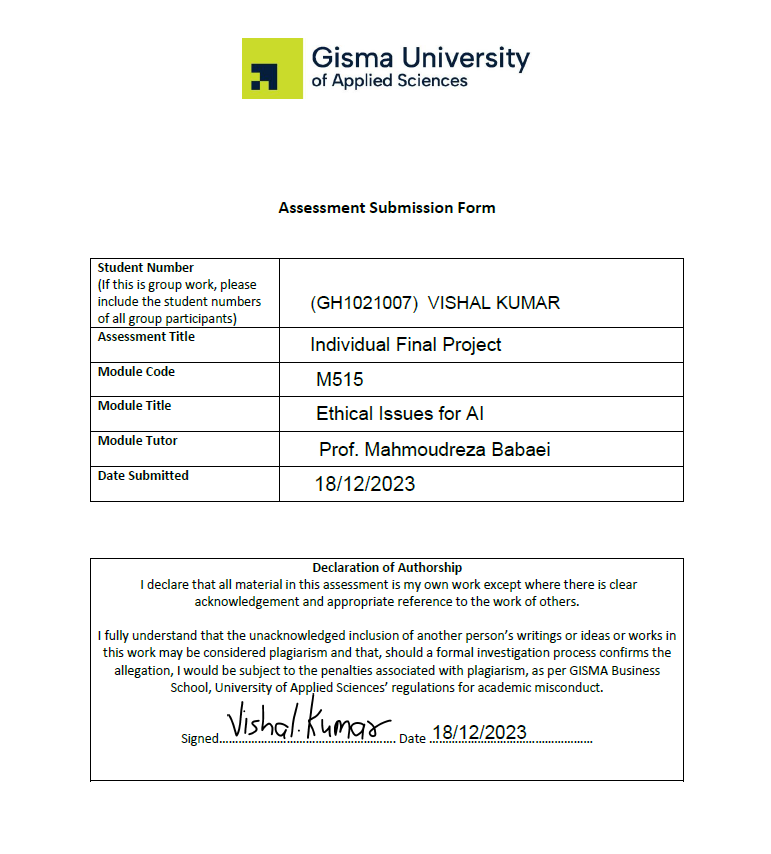

In [2]:
display.Image("/content/Submission form.png")

#   **Introduction:**
As an experienced data scientist at a regarded organization, I'm leading a fastidious analysis to assess the intelligibility and fairness of an artificial intelligence model. Focused on foreseeing the sex or skin color of culprits utilizing the US Homicide Reports dataset (1980-2014), the review expects to examine possible potential biases in casualty portrayals. Our obligation to foster fairness in AI drives an investigation of strategies to relieve identified biases. This exploration is fundamental to our more extensive drive tending to moral contemplations in simulated intelligence. The insights highlight our devotion to responsible and unbiased machine learning rehearses.

#**Problem Statement:**
With a developing dependence on man-made intelligence in different areas, it's pivotal to look at the predispositions these frameworks may innately have. This analysis fixates on a dataset specifying crime cases across the US for more than 34 years. The essential goal is to determine whether the predictive models for recognizing culprit attributes are affected by biases connected with the casualty's socioeconomics. Understanding and tending to such biases is crucial, as they can have extensive ramifications for justice and societal insights.

#**Overview of the Solution:**
This study will involve a detailed exploration of the dataset, including information respectability checks and treatment of missing qualities. We will utilize descriptive statistics to acquire a primary comprehension of the dataset's qualities. The analysis will advance with cutting-edge representations to recognize any patterns, particularly those that could show bias. The utilization of artificial intelligence Fairness 360 (AIF360), a complete toolkit, will be significant in assessing and relieving bias within the predictive model.

#**Dataset Description:**
The dataset is a broad collection of manslaughter reports in the U.S. from 1980 to 2014, including:

**Case Details:** Incorporates explicit data about every crime case, like the date, area, and subtleties of the elaborate gatherings.

**Victim Profiles:** Insights concerning the victims in question, including their sex, age, and skin tone.

**Perpetrator Information:** Information on the culprits while accessible, including their sex, age, skin color, and relationship to the victim.

#**Insights and Visualizations:**
**Trends in Homicide Cases:** A sequential examination of murder patterns throughout the long term, with an emphasis on segment shifts.

**Victim-Perpetrator Relationship Analysis:** Exploration of how casualty profiles connect with perpetrator characteristics.

**Bias Detection:** Use of visualizations like heatmaps to distinguish any possible biases in the data, especially concerning the connection between the person in question and the culprit's socioeconomics.

#**Benefits and Consequences:**
##**Benefits:**
**Criminal Justice Insights:** Gives important bits of knowledge that could illuminate law enforcement arrangements and analytical practices.

**Awareness of Bias:** Features possible biases in wrongdoing detailing and record-keeping, advancing more evenhanded practices.

#**Consequences:**

**Data Sensitivity:** The delicate idea of the data requires cautious dealing with and translation to keep away from distortion.

**Potential for Overgeneralization:** Care should be taken to try not to reach excessively expansive determinations from the data.

#**Strengths & Limitations:**
##**Strengths:**
**Comprehensive Data:** The dataset offers a point by point and longitudinal perspective on crime cases in the U.S.

**Opportunity for Social Insight:** Gives a chance to grasp societal patterns and biases over a critical period.

#**Limitations:**
**Incomplete Data:** Possible gaps in data, particularly in situations where perpetrator data is obscure.

**Complexity of Social Factors:** The intricacy and diverse nature of criminal ways of behaving may not be completely caught in the data.



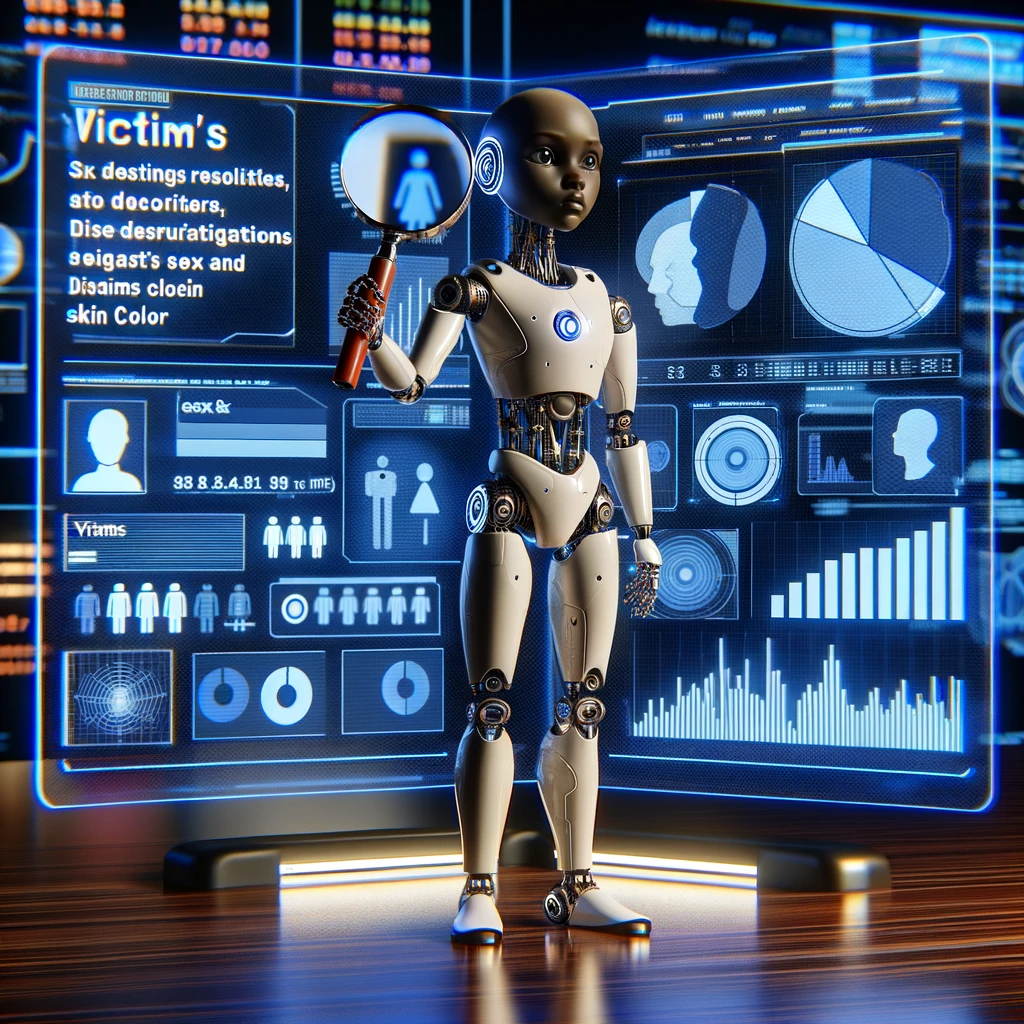

In [3]:
display.Image("/content/ML victim's descriptions.png")

# **1.1 Importing required libraries**

In [4]:
!pip install aif360

In [5]:
%matplotlib inline
# Data manipulation libraries
import pandas as pd
import numpy as np
from time import time

# Graphs and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools

# AI Fairness 360 (AIF360) toolkit
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import LFR, Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification

# Machine Learning
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Miscellaneous utilities
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

<ipython-input-5-97dc9231c7e1>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


## **1.2 Loading the dataset**

In [6]:
data_frame = pd.read_csv('/content/data_base.csv', na_values=['Unknown', ' '])

#**2. Exploratory Data Analysis and data preparation**

Let's jump into the data and comprehend what this dataset is about!

### **2.1 Preparing the dataset**

In [7]:
data_frame.shape

(638447, 24)

In [8]:
data_frame.head().T

0                       1  \
RECORD ID                                          1                       2   
AGENCY CODE                                  AK00101                 AK00101   
AGENCY NAME                                Anchorage               Anchorage   
AGENCY TYPE                         Municipal Police        Municipal Police   
CITY                                       Anchorage               Anchorage   
STATE                                         Alaska                  Alaska   
YEAR                                            1980                    1980   
MONTH                                        January                   March   
INCIDENT                                           2                       1   
CRIME TYPE                    Murder or Manslaughter  Murder or Manslaughter   
CRIME SOLVED                                     Yes                     Yes   
VICTIM SEX                                    Female                    Male   
VICTIM AGE                                        15                      43   
VICTIM RACE            Native American/Alaska Native                   White   
VICTIM ETHNICITY                                 NaN                     NaN   
PERPETRATOR SEX                                 Male                    Male   
PERPETRATOR AGE                                 14.0                    41.0   
PERPETRATOR RACE       Native American/Alaska Native                   White   
PERPETRATOR ETHNICITY                            NaN                     NaN   
RELATIONSHIP                            Acquaintance            Acquaintance   
WEAPON                                         Rifle           Strangulation   
VICTIM COUNT                                       0                       0   
PERPETRATOR COUNT                                  0                       0   
RECORD SOURCE                                    FBI                     FBI   

                                                   2                       3  \
RECORD ID                                          3                       4   
AGENCY CODE                                  AK00101                 AK00101   
AGENCY NAME                                Anchorage               Anchorage   
AGENCY TYPE                         Municipal Police        Municipal Police   
CITY                                       Anchorage               Anchorage   
STATE                                         Alaska                  Alaska   
YEAR                                            1980                    1980   
MONTH                                          March                   April   
INCIDENT                                           2                       1   
CRIME TYPE                    Murder or Manslaughter  Murder or Manslaughter   
CRIME SOLVED                                      No                     Yes   
VICTIM SEX                                    Female                    Male   
VICTIM AGE                                        31                      42   
VICTIM RACE            Native American/Alaska Native                   White   
VICTIM ETHNICITY                                 NaN                     NaN   
PERPETRATOR SEX                                  NaN                    Male   
PERPETRATOR AGE                                  0.0                    42.0   
PERPETRATOR RACE                                 NaN                   White   
PERPETRATOR ETHNICITY                            NaN                     NaN   
RELATIONSHIP                                     NaN            Acquaintance   
WEAPON                                           NaN           Strangulation   
VICTIM COUNT                                       0                       0   
PERPETRATOR COUNT                                  0                       0   
RECORD SOURCE                                    FBI                     FBI   

                                                 

In [9]:
data_frame.columns

Index(['RECORD ID', 'AGENCY CODE', 'AGENCY NAME', 'AGENCY TYPE', 'CITY',
       'STATE', 'YEAR', 'MONTH', 'INCIDENT', 'CRIME TYPE', 'CRIME SOLVED',
       'VICTIM SEX', 'VICTIM AGE', 'VICTIM RACE', 'VICTIM ETHNICITY',
       'PERPETRATOR SEX', 'PERPETRATOR AGE', 'PERPETRATOR RACE',
       'PERPETRATOR ETHNICITY', 'RELATIONSHIP', 'WEAPON', 'VICTIM COUNT',
       'PERPETRATOR COUNT', 'RECORD SOURCE'],
      dtype='object')

We want to drop the accompanying column :
* **Record ID:** It used to be an ID so novel for each record
* **Agency Code:** can be important yet it's the very same as the Agency
* **Perpetrator Ethnicity and Age:**  it compares to the target columns

In [10]:
cols__to_drop = ['RECORD ID', 'AGENCY CODE', 'PERPETRATOR ETHNICITY']
data_orig = data_frame.copy()
data_frame.drop(columns=cols__to_drop, inplace=True)
cols__to_drop = []

Number total of rows: 638447


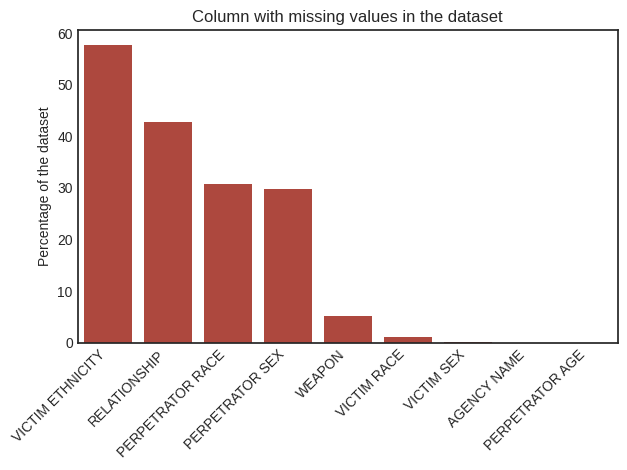

In [11]:
def print_missing_values_sns(data):
    data__null = pd.DataFrame(len(data) - data.notnull().sum(), columns=['Count'])
    data__null = data__null[data__null['Count'] > 0].sort_values(by='Count', ascending=False)
    data__null = data__null / len(data) * 100

    sns.barplot(x=data__null.index, y=data__null['Count'], color='#c0392b')
    plt.title('Column with missing values in the dataset')
    plt.ylabel('Percentage of the dataset')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Usage
print('Number total of rows:', str(data_frame.shape[0]))
print_missing_values_sns(data_frame)


In [12]:
data_frame['CRIME SOLVED'].value_counts()

Yes    448166
No     190281
Name: CRIME SOLVED, dtype: int64

To foresee the sex and skin shade of the criminal it's important to drop the cases that are not settled

In [13]:
data_orig = data_frame.copy()
# data = data_orig

data = data_frame[data_frame['CRIME SOLVED'] == 'Yes']
cols__to_drop += ['CRIME SOLVED']

In [14]:
data['PERPETRATOR AGE CATEGORY'] = np.where(data['PERPETRATOR AGE'] > 64, 'Elder', np.where(data['PERPETRATOR AGE'] < 25, 'Young', 'Adult'))
# data['Victim Age category'] = np.where(data['Victim Age'] > 64, 'Elder', np.where(data['Victim Age'] < 25, 'Young', 'Adult'))

In [15]:
Y_columns = ['PERPETRATOR SEX', 'PERPETRATOR RACE', 'PERPETRATOR AGE CATEGORY']
ignore_columns = ['CRIME SOLVED']
cat_columns = []
num_columns = []

for col in data.columns.values:
    if col in Y_columns+ignore_columns:
        continue
    elif data[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]


### **2.2 Handle missing values**
Now let's handle missing values, there are two cases to handle, numerical and categorical values.

**Numerical values:** put the middle worth of the section all things considered

**Categorical values:** put a value called "Missing value" all things considered

So the initial step is to gather every middle value

In [16]:
median_val = pd.Series()
for col in num_columns:
    if col not in cols__to_drop:
        median_val[col] = data[col].median()

In [17]:
median_val

YEAR                 1995.0
INCIDENT                2.0
VICTIM AGE             30.0
VICTIM COUNT            0.0
PERPETRATOR COUNT       0.0
dtype: float64

In [18]:
def handle__missing__values(data, median_val):
    d_f = data.copy()
    for col in d_f:
        if col in median_val.index.values:
            d_f[col] = d_f[col].fillna(median_val[col])
        else:
            d_f[col] = d_f[col].fillna("Missing value")

    return d_f

In [19]:
data = handle__missing__values(data, median_val)

### **2.3 Visualization**
#### **2.3.1 Numerical columns**

In [20]:
def target__distribution(y__var, data):
    val = data[y__var]

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("YlGnBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y__var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y__var)
    plt.show()

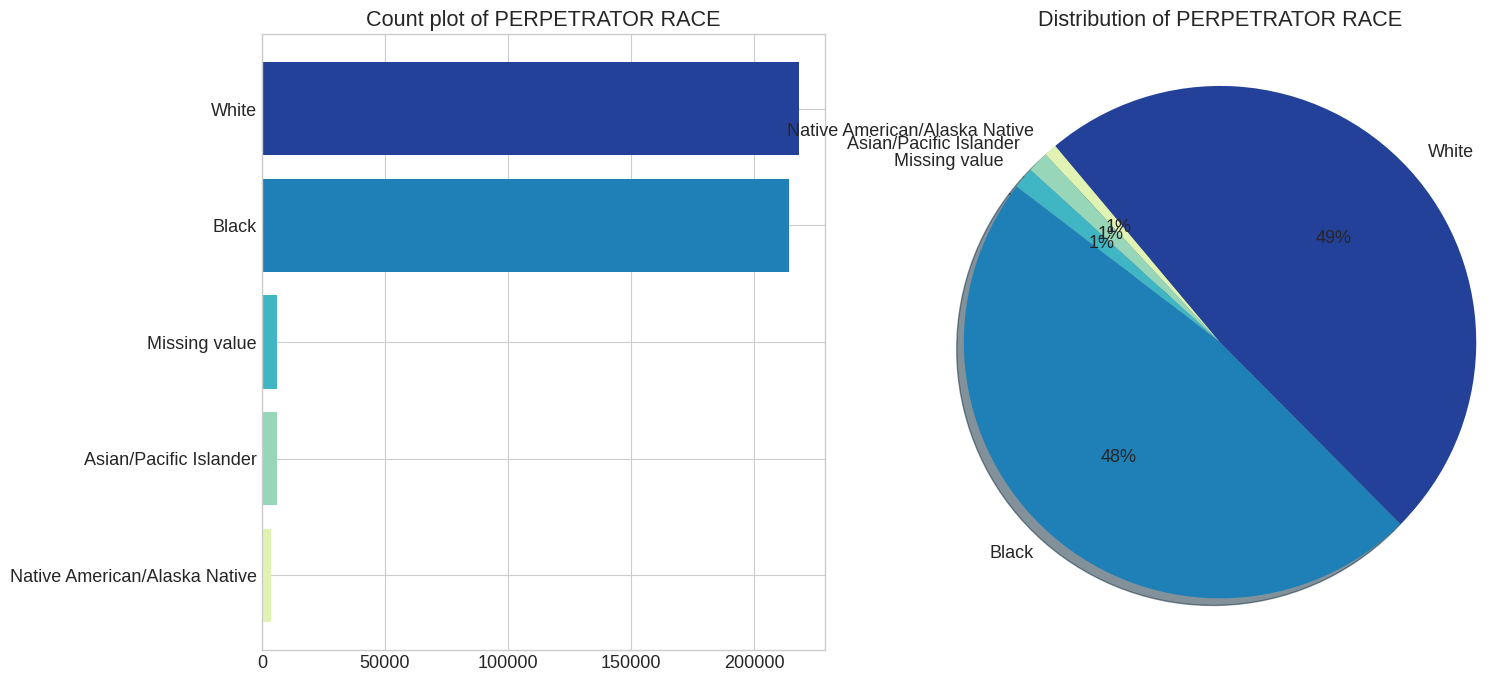

In [21]:
var = 'PERPETRATOR RACE'
target__distribution(y__var=var, data=data)

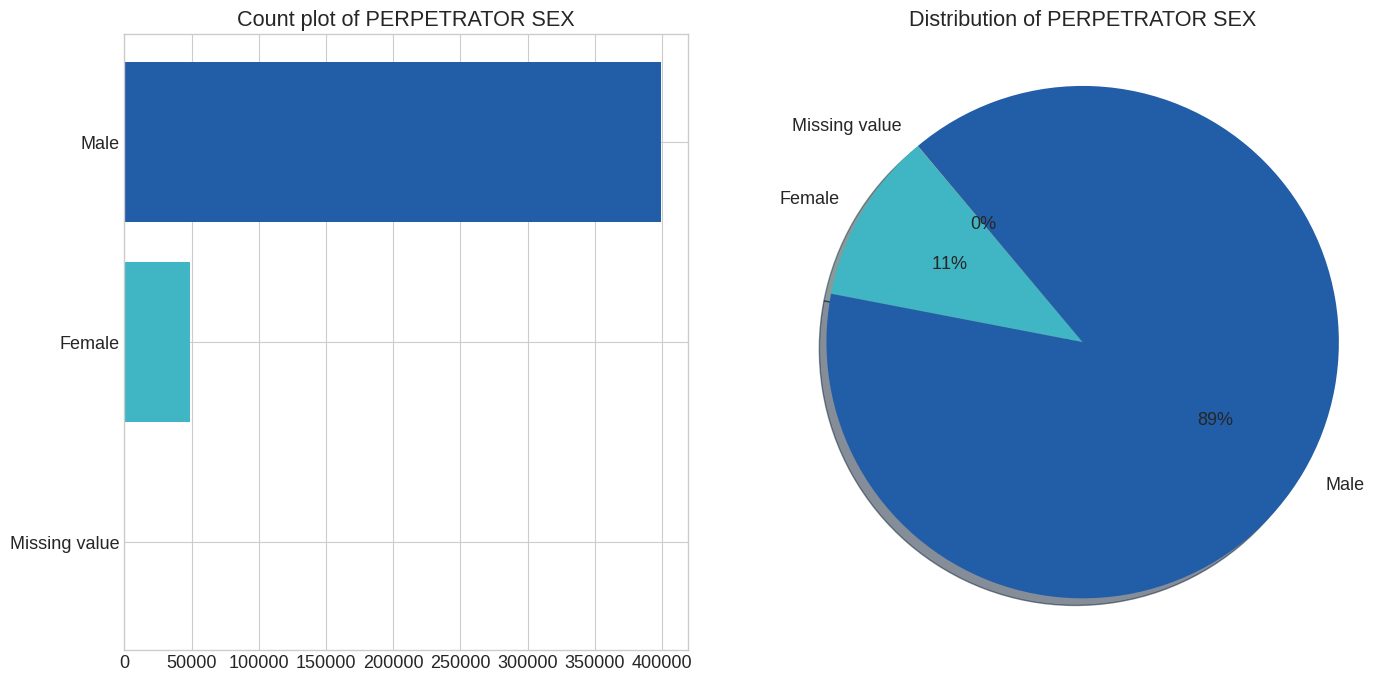

In [22]:
var = 'PERPETRATOR SEX'
target__distribution(y__var=var, data=data)

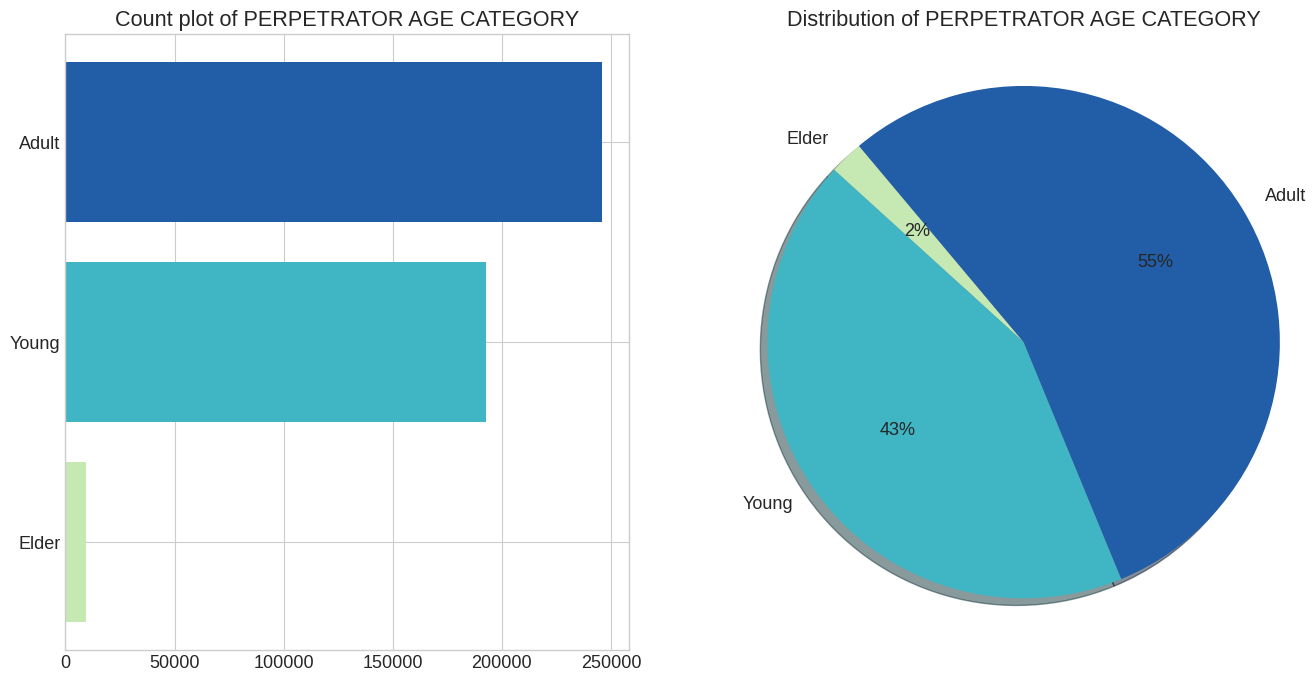

In [23]:
var = 'PERPETRATOR AGE CATEGORY'
target__distribution(y__var=var, data=data)

In [24]:
data['Frequency'] = 1
freq__target = data[['PERPETRATOR SEX', 'PERPETRATOR RACE', 'PERPETRATOR AGE CATEGORY', 'Frequency']]
del data['Frequency']
freq__target = freq__target.groupby(by=['PERPETRATOR SEX', 'PERPETRATOR RACE', 'PERPETRATOR AGE CATEGORY']).count() / len(data)
print(freq__target.sort_values(by='Frequency', ascending=False))

                                                                        Frequency
PERPETRATOR SEX PERPETRATOR RACE              PERPETRATOR AGE CATEGORY           
Male            White                         Adult                      0.264264
                Black                         Young                      0.220369
                                              Adult                      0.197420
                White                         Young                      0.159222
Female          Black                         Adult                      0.035842
                White                         Adult                      0.034742
                Black                         Young                      0.018415
                White                         Young                      0.013765
Male            White                         Elder                      0.013439
                Missing value                 Young                      0.008546
                

Assuming we put together our model concerning the most frequent values we found that as a matter of course there is a 26% chance that the culprit is a white adult man.

In [25]:
def plot__histo(data, col, Y_columns):
    d_f = data.copy()

    # Ensure there are at least two subplots
    num_cols = min(len(Y_columns), 2)
    fig, axs = plt.subplots(1, num_cols, figsize=(20, 6))

    for i in range(num_cols):
        cnt = []
        y_col = Y_columns[i]
        Y_values = d_f[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt.append(d_f[d_f[y_col] == val][col].values)  # Append to cnt for each value
        bins = d_f[col].nunique()

        # Plot the histogram for each category
        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values, loc='upper right')
        axs[i].set_title("Histogram of the " + col + " column by " + y_col)

    plt.tight_layout()  # Adjust layout for better visibility
    plt.show()


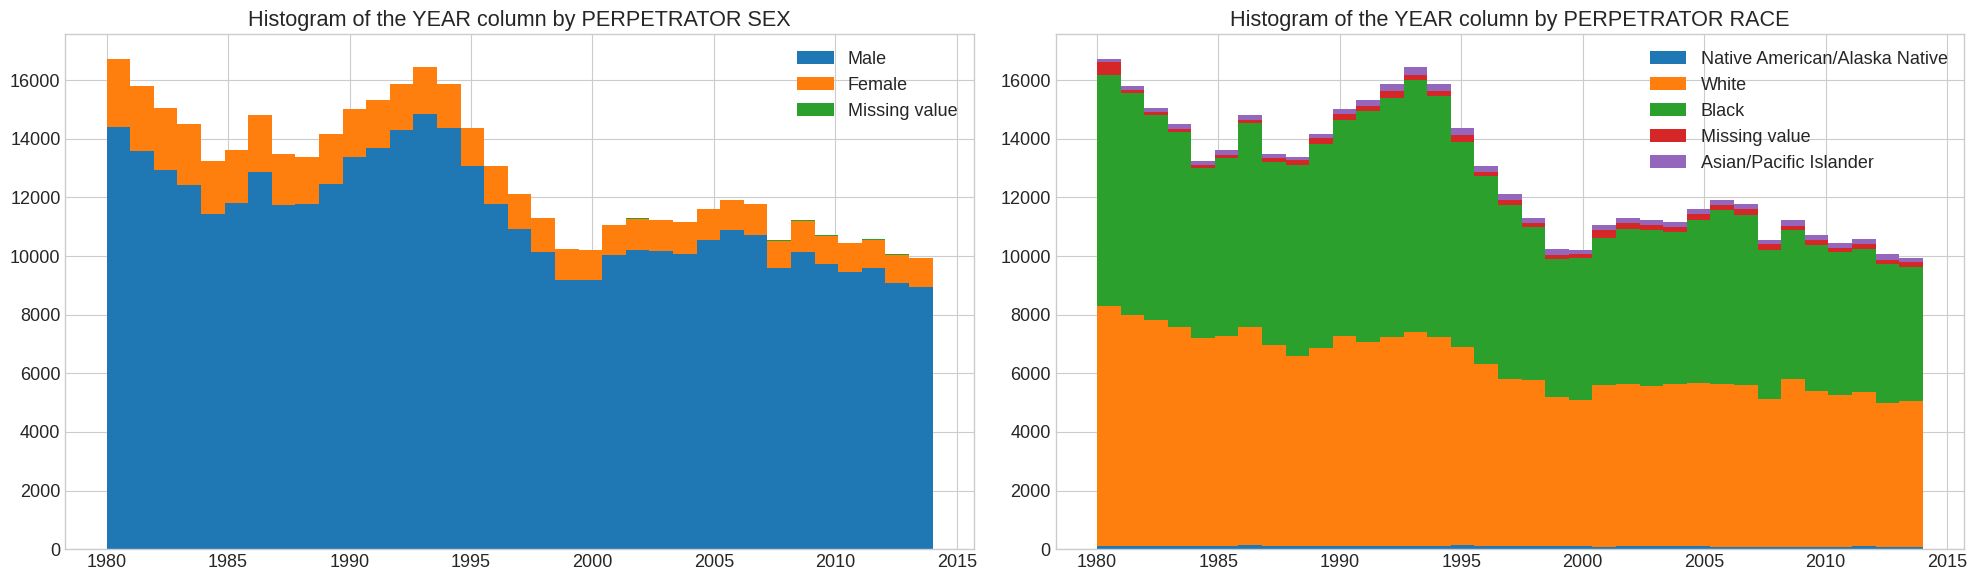

In [26]:
plot__histo(data, col='YEAR',Y_columns=Y_columns)

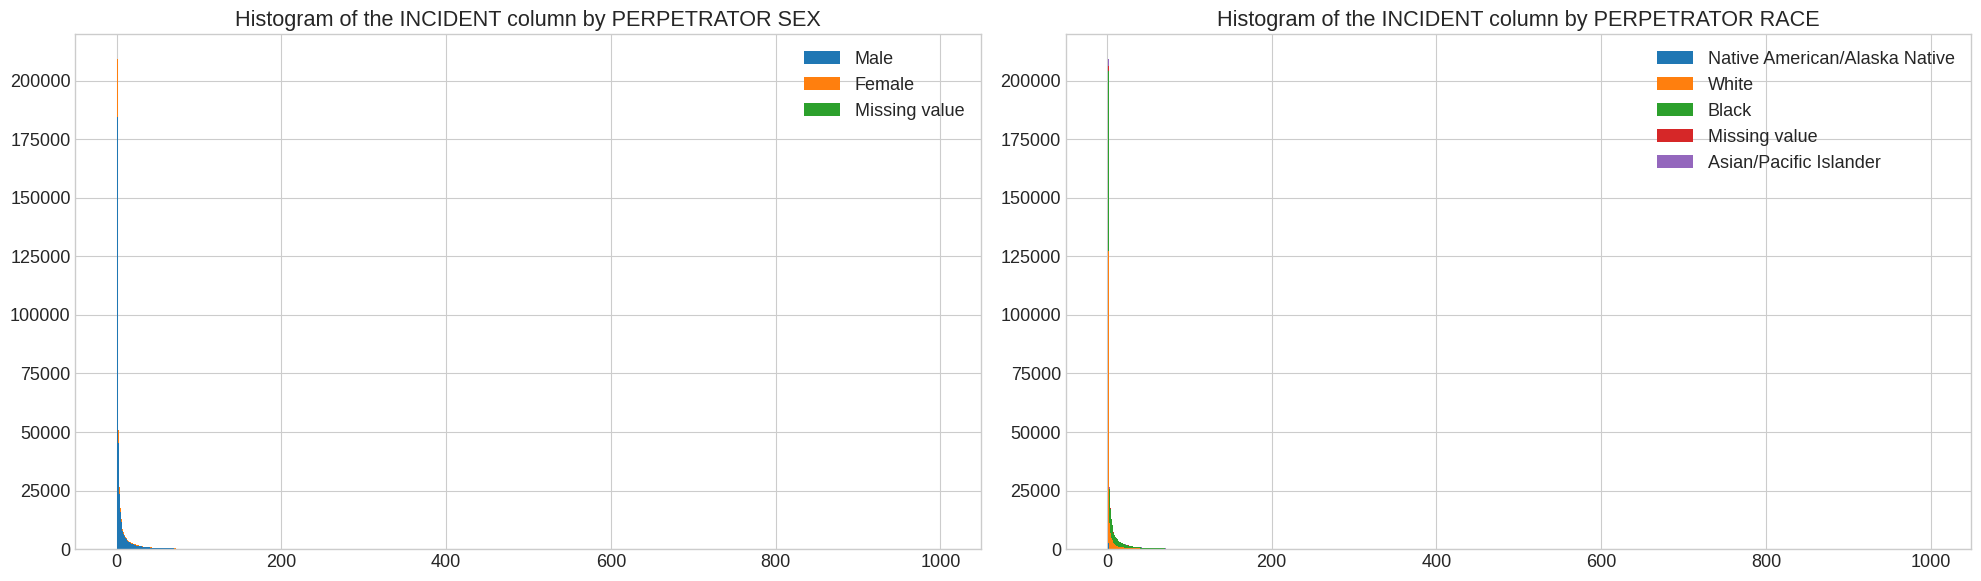

In [27]:
plot__histo(data, col='INCIDENT',Y_columns=Y_columns)

This section is difficult to utilize, so I chose to eliminated it.

In [28]:
cols__to_drop += ['INCIDENT']

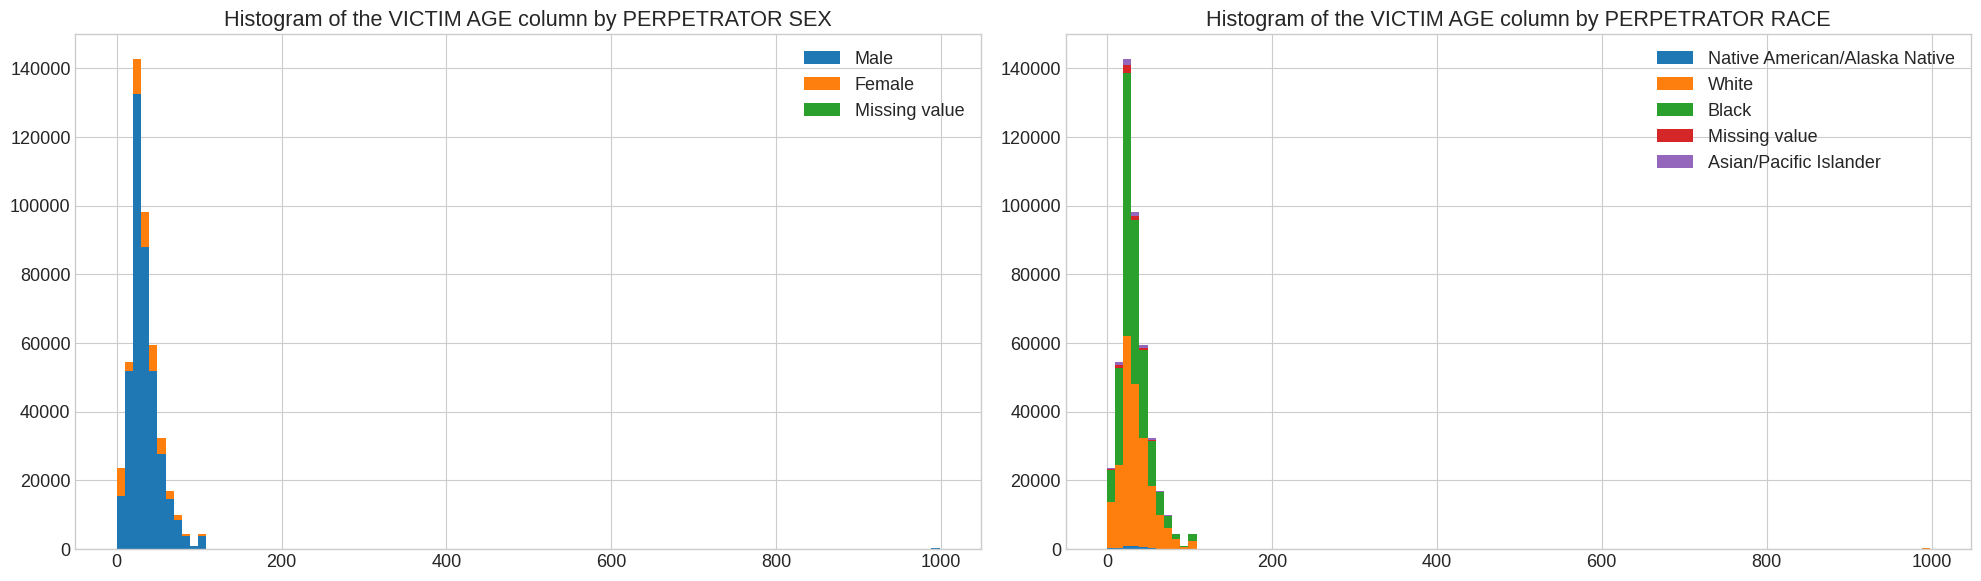

In [29]:
plot__histo(data, col='VICTIM AGE',Y_columns=Y_columns)

With this histogram, clearly, there are a few outliers.

In [30]:
data[data['VICTIM AGE'] > 100]['VICTIM AGE'].value_counts()

998    369
Name: VICTIM AGE, dtype: int64

With this data that there are 998 years of age individuals in the dataset, we can finish up this is a blunder, so how about we handle these qualities by supplanting them with the median value.

In [31]:
data['VICTIM AGE'] = np.where(data['VICTIM AGE'] == 998, np.median(data[data['VICTIM AGE'] <= 100]['VICTIM AGE']), data['VICTIM AGE'])

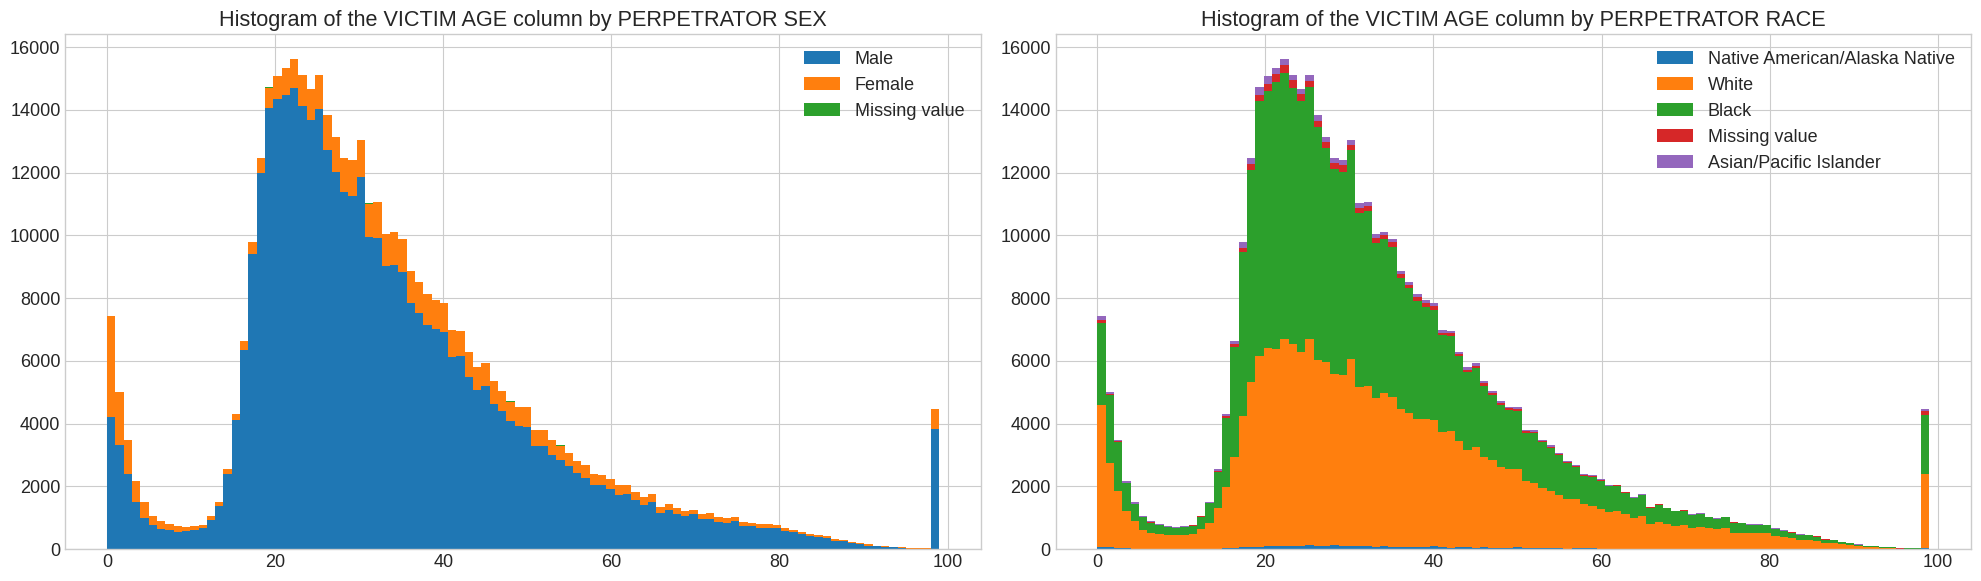

In [32]:
plot__histo(data, col='VICTIM AGE',Y_columns=Y_columns)

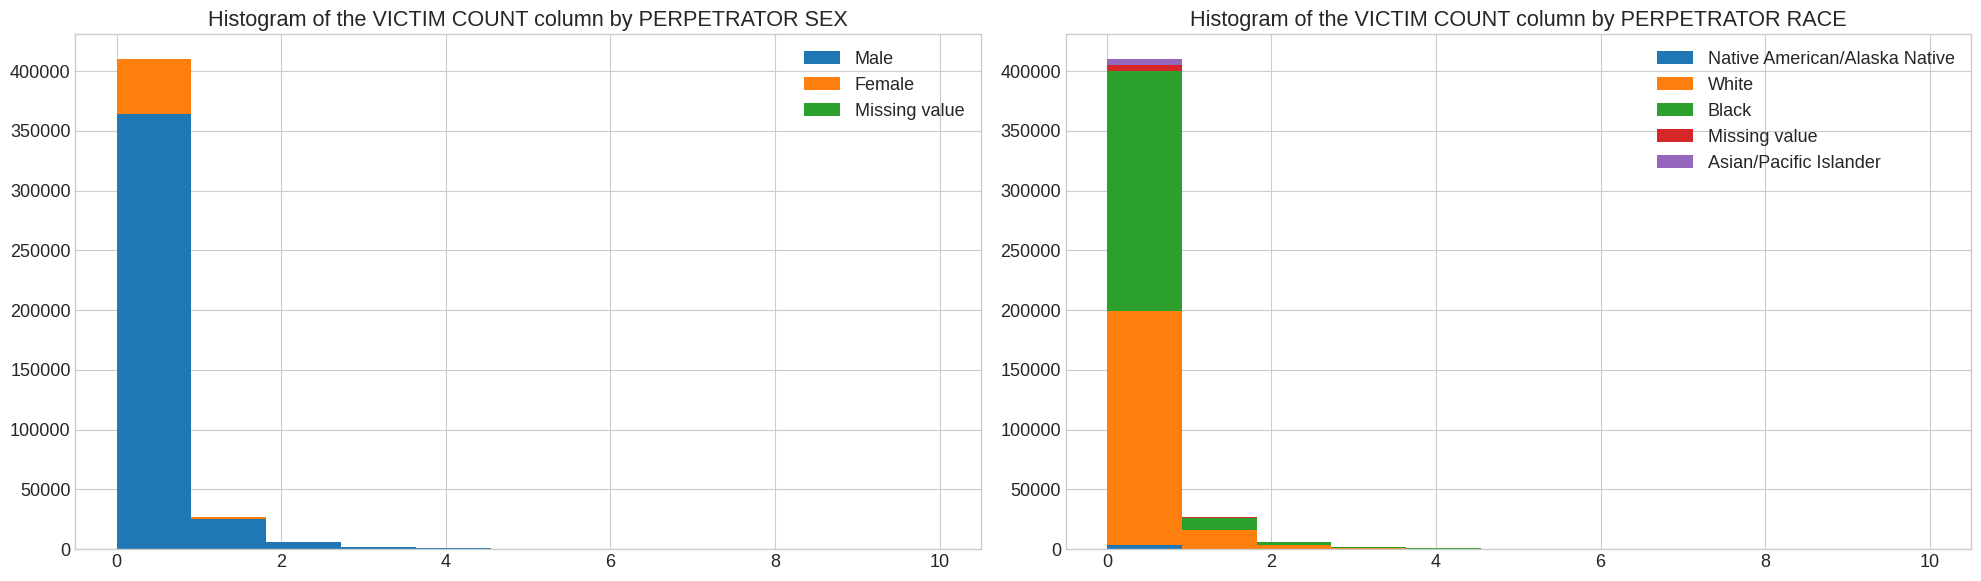

In [33]:
plot__histo(data, col='VICTIM COUNT',Y_columns=Y_columns)

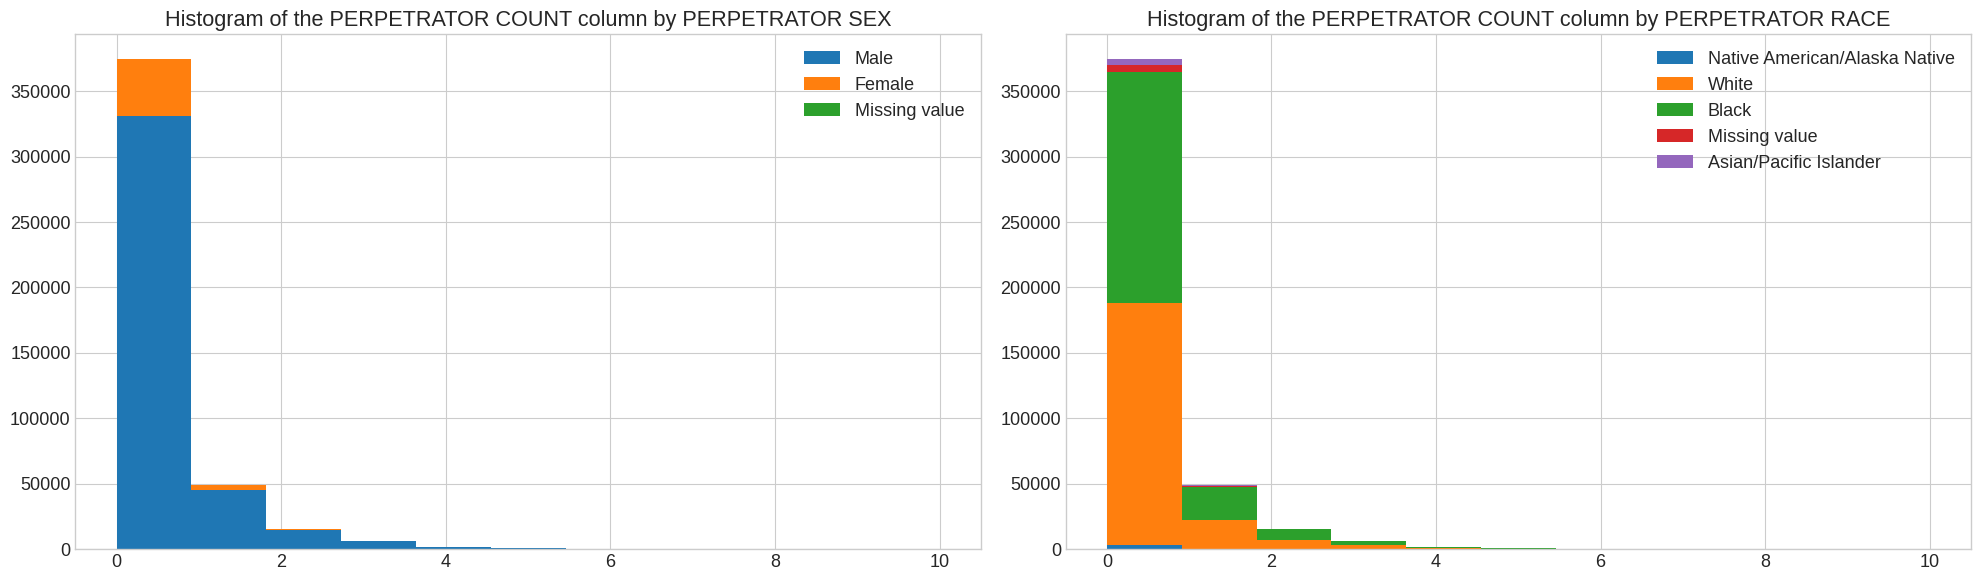

In [34]:
plot__histo(data, col='PERPETRATOR COUNT',Y_columns=Y_columns)

#### **2.3.2 Categorical columns**

In [35]:
cat_columns

['AGENCY NAME',
 'AGENCY TYPE',
 'CITY',
 'STATE',
 'MONTH',
 'CRIME TYPE',
 'VICTIM SEX',
 'VICTIM RACE',
 'VICTIM ETHNICITY',
 'PERPETRATOR AGE',
 'RELATIONSHIP',
 'WEAPON',
 'RECORD SOURCE']

In [36]:
def plot__bar(data, col, Y_columns, max_cat=10):
    d_f = data.copy()

    fig, axs = plt.subplots(1,2,figsize=(21,7))
    cat_val = d_f[col].value_counts()[0:max_cat].index.values
    d_f = d_f[d_f[col].isin(cat_val)]

    for i in range(0,2):
        y_col = Y_columns[i]
        Y_values = d_f[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt = d_f[d_f[y_col] == val][col].value_counts().sort_index()
            axs[i].barh(cnt.index.values, cnt.values)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Bar plot of the "+col+" column by "+y_col)

    plt.show()

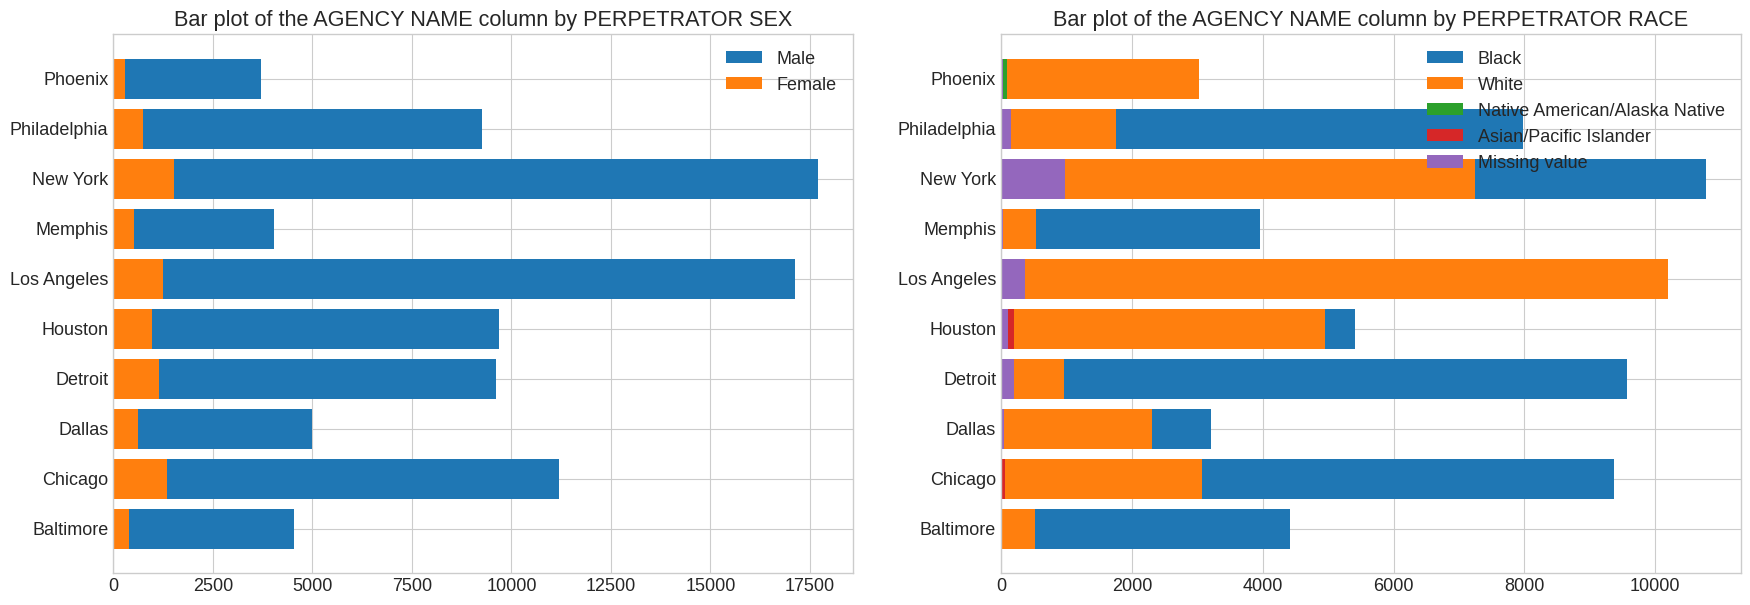

In [37]:
plot__bar(data, col='AGENCY NAME',Y_columns=Y_columns)

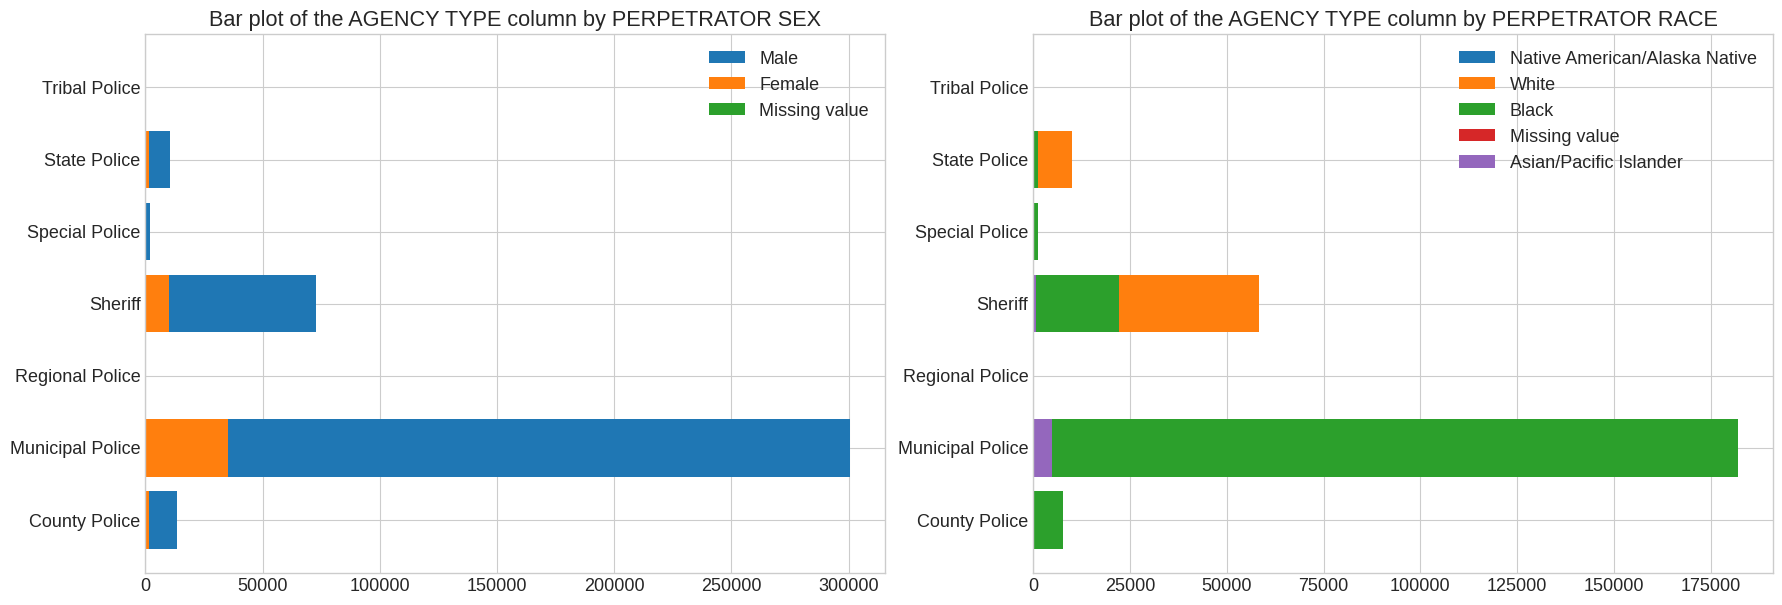

In [38]:
plot__bar(data, col='AGENCY TYPE',Y_columns=Y_columns)

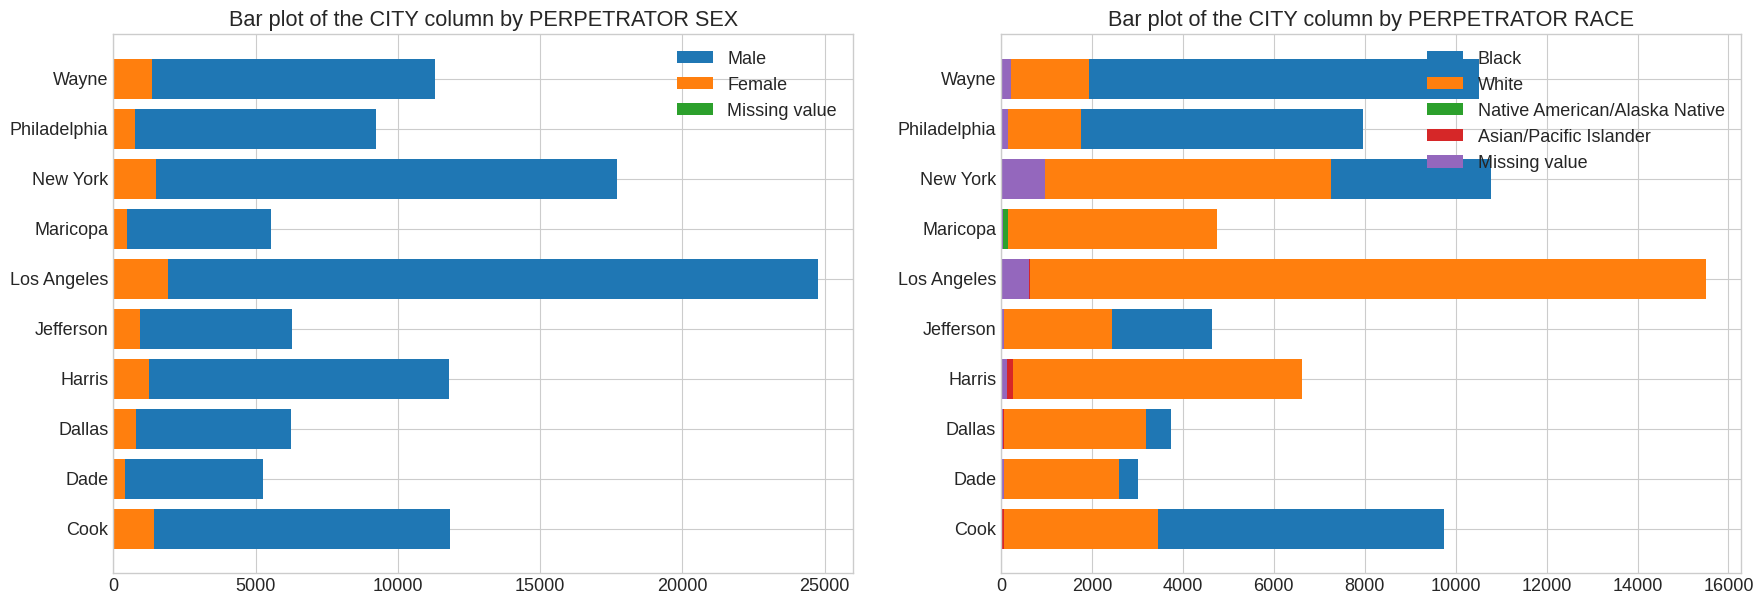

In [39]:
plot__bar(data, col='CITY',Y_columns=Y_columns)

We must be cautious about bias in this column, particularly for the skin variety esteem, we can see that a few urban communities have more white culprits.

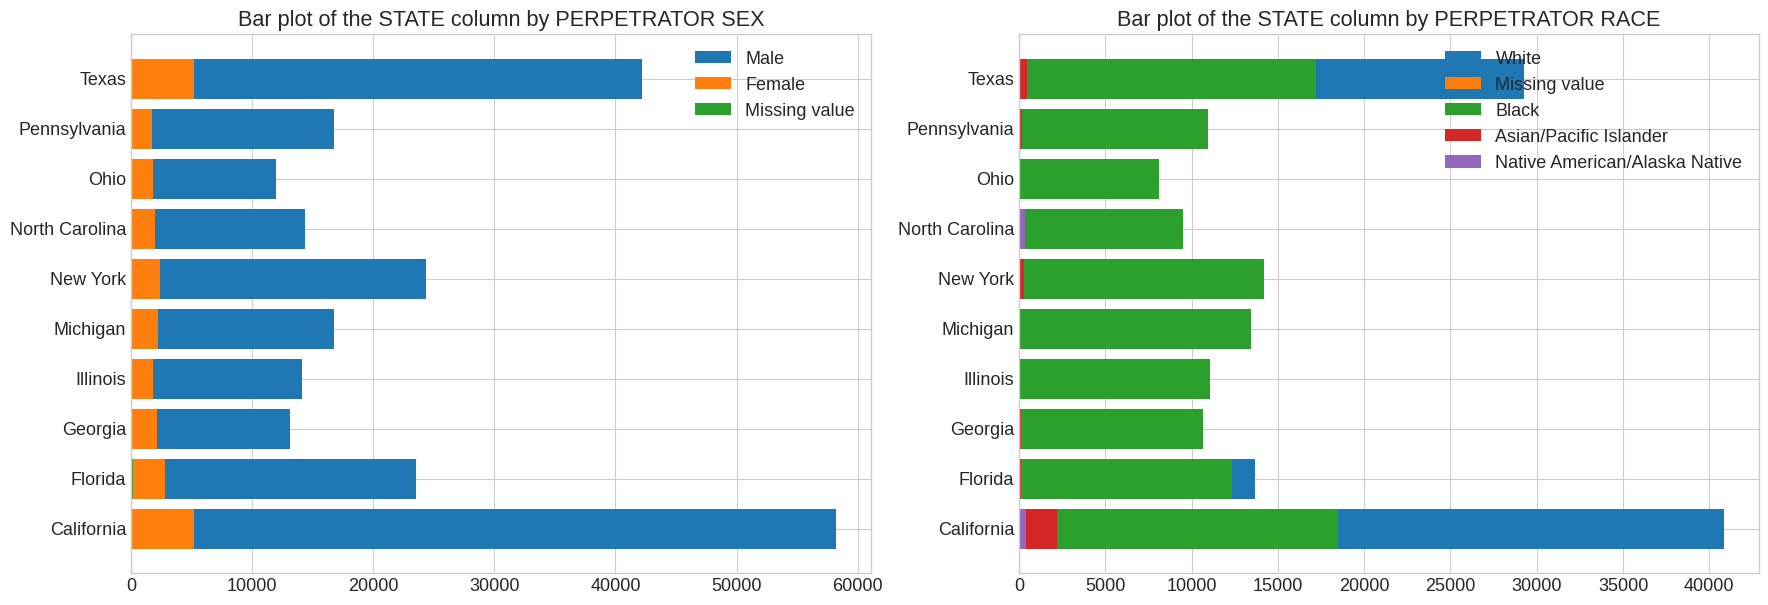

In [40]:
plot__bar(data, col='STATE',Y_columns=Y_columns)

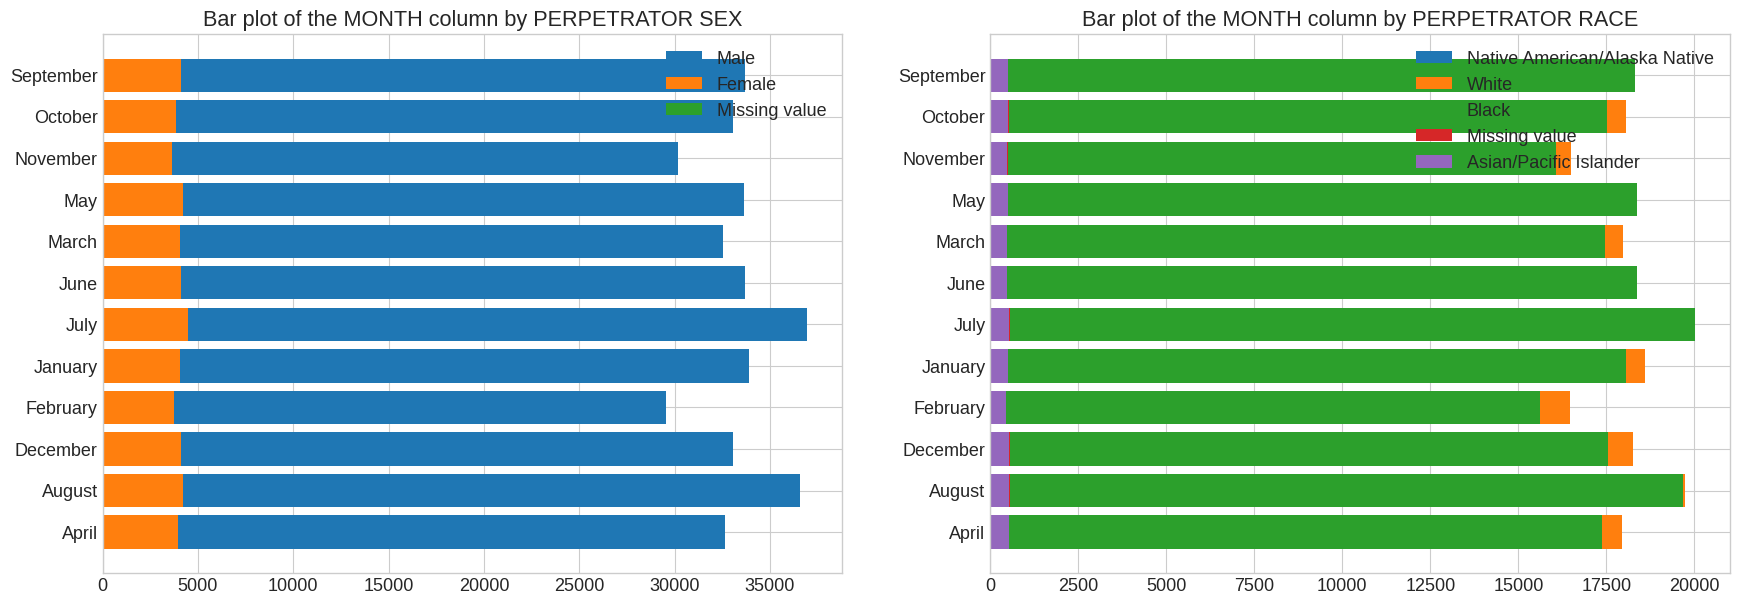

In [41]:
plot__bar(data, col='MONTH',Y_columns=Y_columns, max_cat=12)

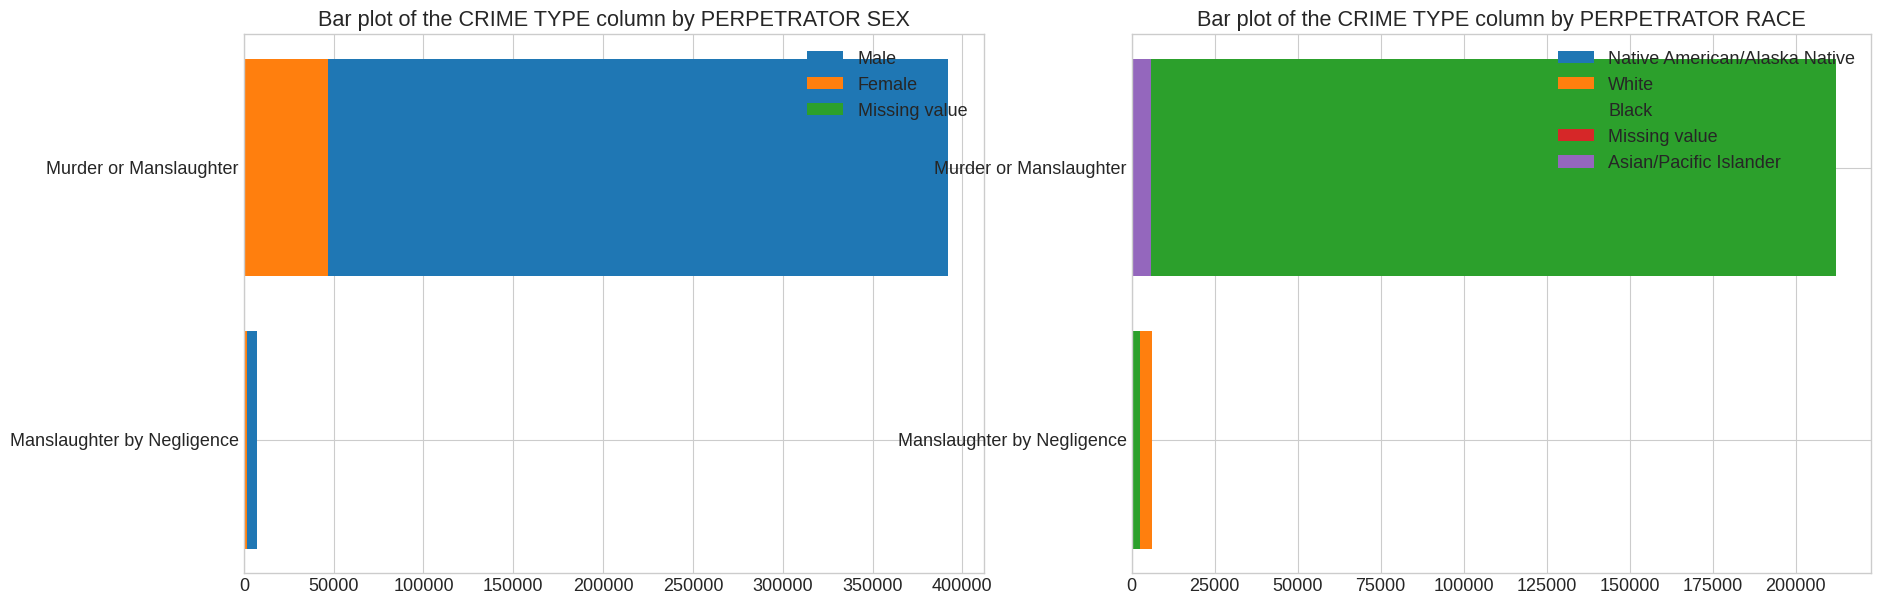

In [42]:
plot__bar(data, col='CRIME TYPE',Y_columns=Y_columns)

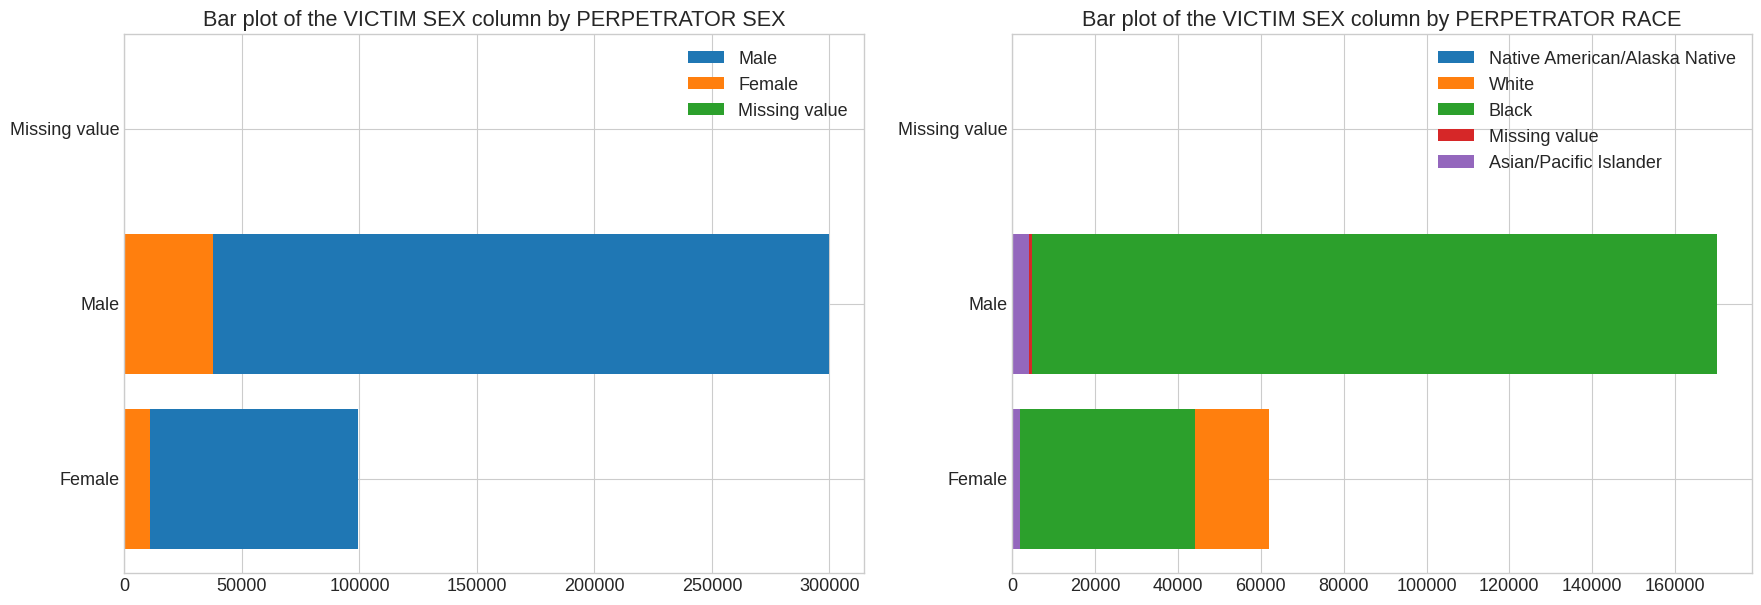

In [43]:
plot__bar(data, col='VICTIM SEX',Y_columns=Y_columns)

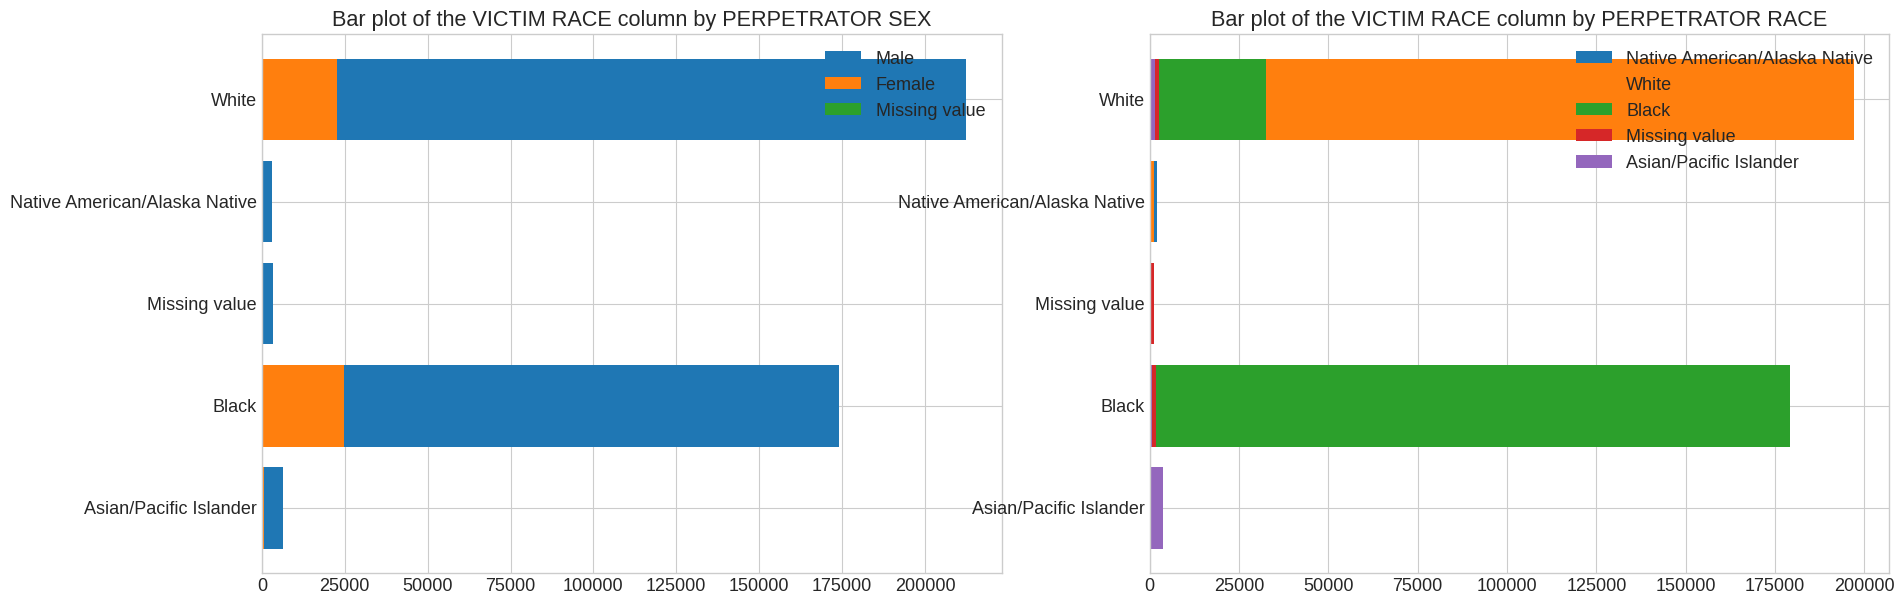

In [44]:
plot__bar(data, col='VICTIM RACE',Y_columns=Y_columns)

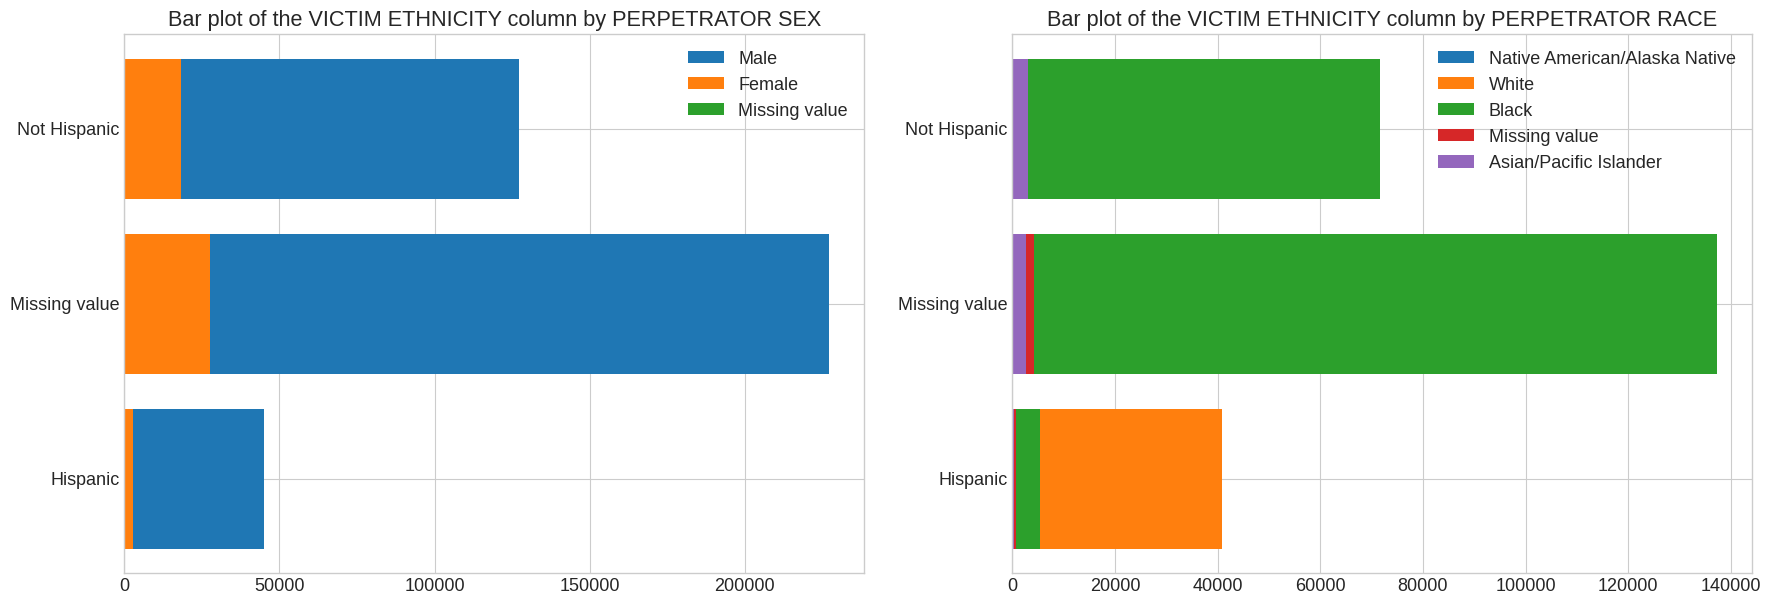

In [45]:
plot__bar(data, col='VICTIM ETHNICITY',Y_columns=Y_columns)

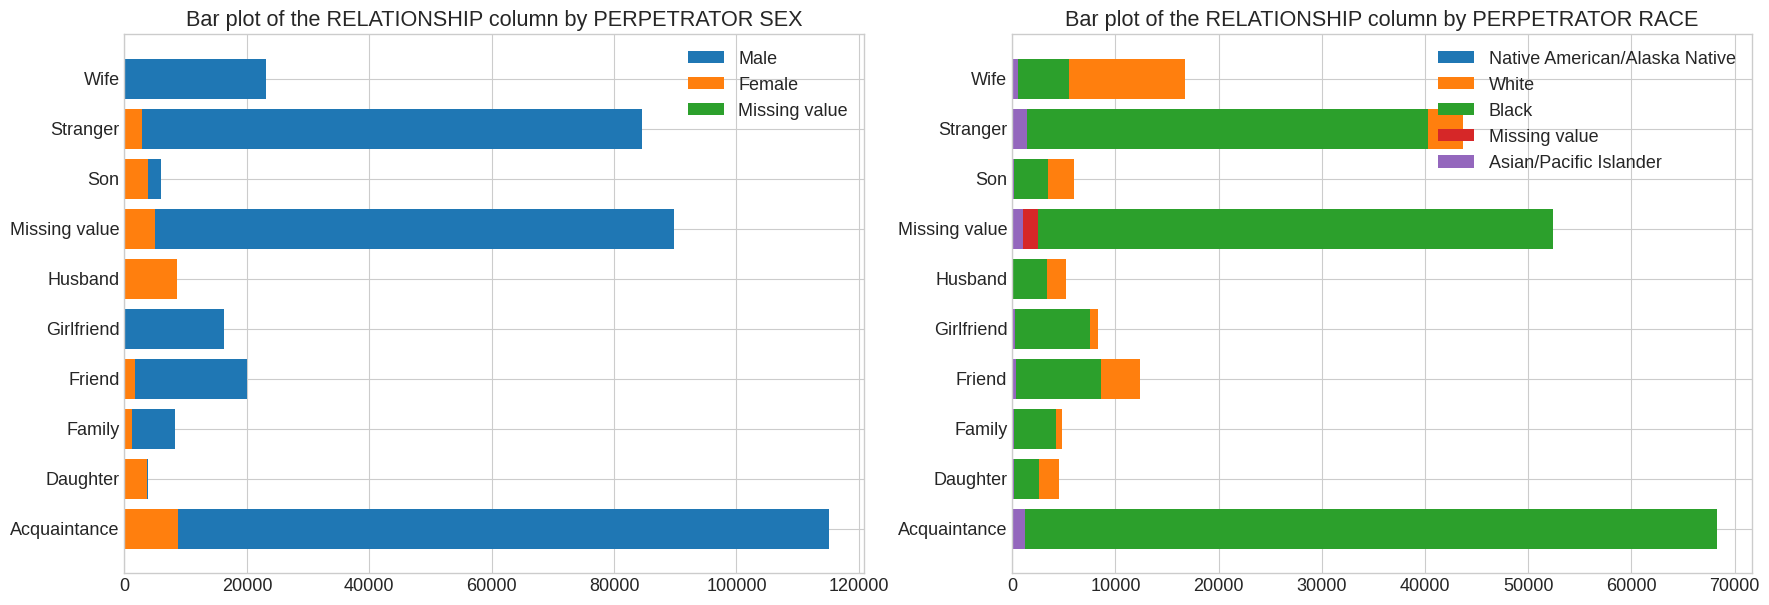

In [46]:
plot__bar(data, col='RELATIONSHIP', Y_columns=Y_columns)

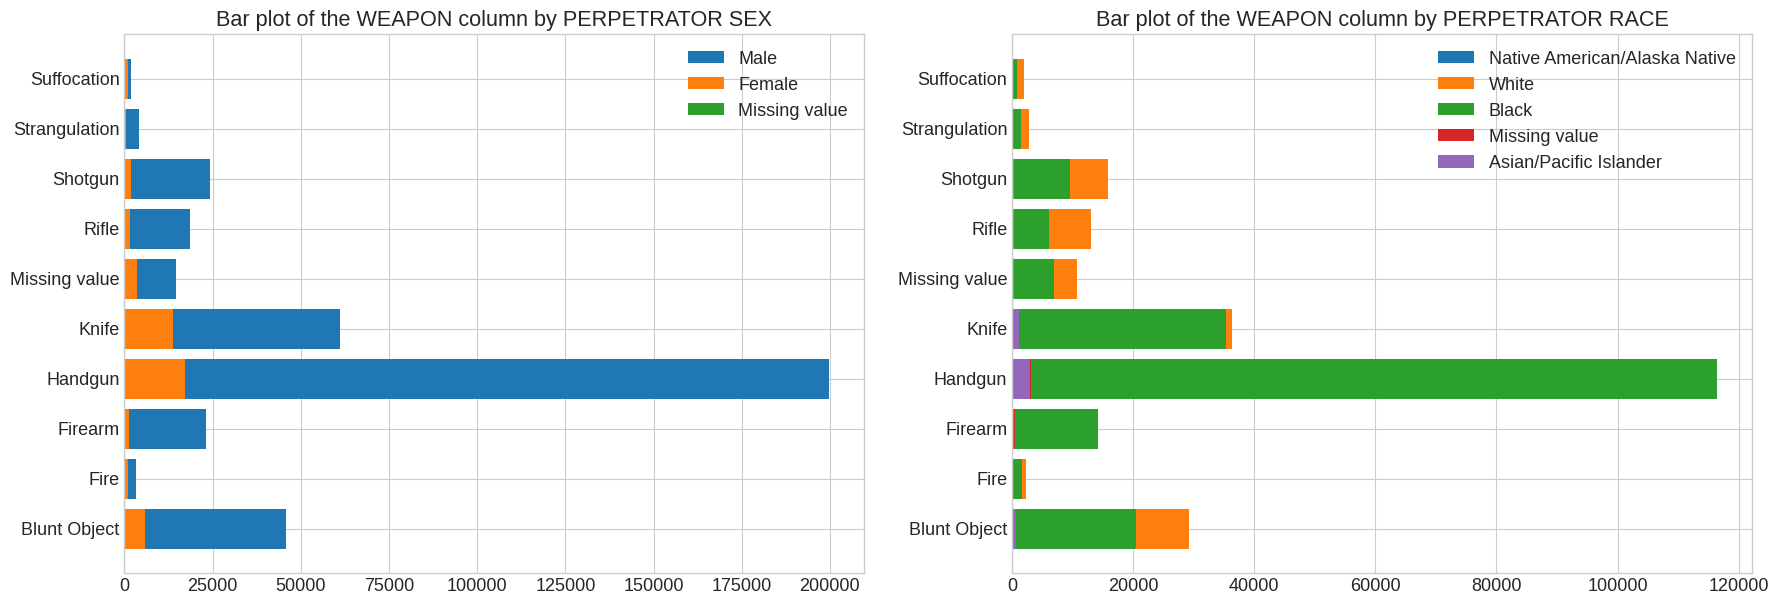

In [47]:
plot__bar(data, col='WEAPON', Y_columns=Y_columns)

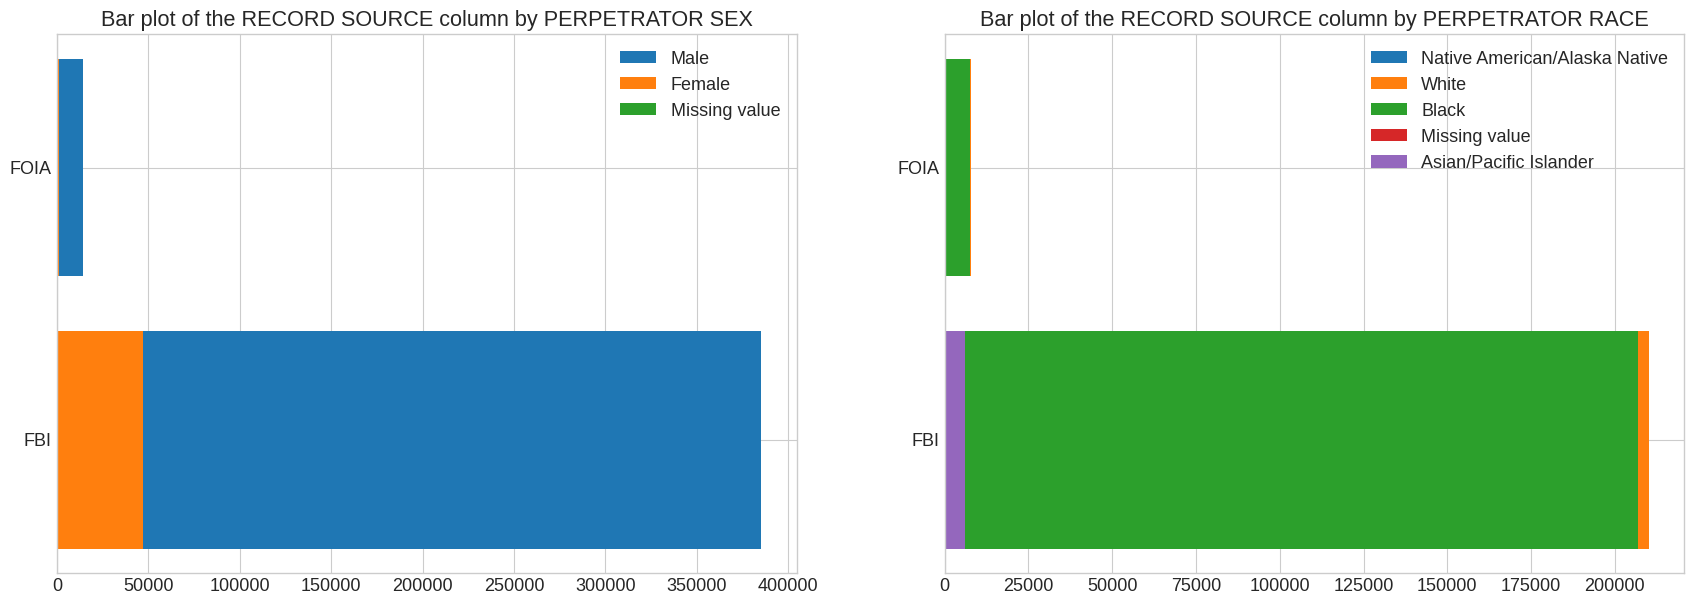

In [48]:
plot__bar(data, col='RECORD SOURCE', Y_columns=Y_columns)

Presently we should drop column that are futile

In [49]:
data.drop(cols__to_drop, axis=1, inplace=True)

### **2.4 Working with feature**
#### **2.4.1 Encoding categorical columns**


In [50]:
categorical_features = cat_columns + ['PERPETRATOR SEX', 'PERPETRATOR RACE', 'PERPETRATOR AGE CATEGORY']

# Check if every column in categorical_features is in the DataFrame segments
categorical_features_idx = [np.where(data.columns.values == col)[0][0] for col in categorical_features if col in data.columns]

# To see which columns are missing, you can do the accompanying:
missing_cols = [col for col in categorical_features if col not in data.columns]
if missing_cols:
    print("Missing columns:", missing_cols)


In [51]:
data_encoded = data.copy()

categorical__names = {}
encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])

    data_encoded[feature] = le.transform(data_encoded[feature])

    categorical__names[feature] = le.classes_
    encoders[feature] = le

#### **2.4.2 Scaling numerical columns**

I decided to scale these columns because later in this journal I will utilize a neural network so utilizing it is essential.


In [52]:
numerical_features = [c for c in data.columns.values if c not in categorical_features]

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms

data_encoded = data_encoded.astype(float)

del num_columns

In [53]:
data_encoded.head()

AGENCY NAME  AGENCY TYPE  CITY  STATE  YEAR  MONTH  CRIME TYPE  VICTIM SEX  \
0        146.0          1.0  35.0    1.0   0.0    4.0         1.0         0.0   
1        146.0          1.0  35.0    1.0   0.0    7.0         1.0         1.0   
3        146.0          1.0  35.0    1.0   0.0    0.0         1.0         1.0   
5        146.0          1.0  35.0    1.0   0.0    8.0         1.0         1.0   
6        146.0          1.0  35.0    1.0   0.0    8.0         1.0         0.0   

   VICTIM AGE  VICTIM RACE  VICTIM ETHNICITY  PERPETRATOR SEX  \
0    0.151515          3.0               1.0              1.0   
1    0.434343          4.0               1.0              1.0   
3    0.424242          4.0               1.0              1.0   
5    0.303030          4.0               1.0              1.0   
6    0.434343          3.0               1.0              1.0   

   PERPETRATOR AGE  PERPETRATOR RACE  RELATIONSHIP  WEAPON  VICTIM COUNT  \
0             14.0               3.0           0.0    12.0           0.0   
1             41.0               4.0           0.0    14.0           0.0   
3             42.0               4.0           0.0    14.0           0.0   
5             35.0               4.0           0.0    12.0           0.0   
6             27.0               1.0          27.0     9.0           0.0   

   PERPETRATOR COUNT  RECORD SOURCE  PERPETRATOR AGE CATEGORY  
0                0.0            0.0                       2.0  
1                0.0            0.0                       0.0  
3                0.0            0.0                       0.0  
5                0.0            0.0                       0.0  
6                0.0            0.0                       0.0

This dataset is difficult to comprehend for a human so we should create a capability that permits us to get back the first values.

In [54]:
def decode_dataset(data, encoders, numerical_features, categorical_features):
    df = data.copy()
    for feat in df.columns.values:
        if feat in numerical_features:
            df[feat] = encoders[feat].inverse_transform(np.array(df[feat]).reshape(-1, 1))
    for feat in categorical_features:
        df[feat] = encoders[feat].inverse_transform(df[feat].astype(int))
    return df

In [55]:
decode_dataset(data_encoded, encoders=encoders, numerical_features=numerical_features, categorical_features=categorical_features).head()

AGENCY NAME       AGENCY TYPE       CITY   STATE    YEAR    MONTH  \
0   Anchorage  Municipal Police  Anchorage  Alaska  1980.0  January   
1   Anchorage  Municipal Police  Anchorage  Alaska  1980.0    March   
3   Anchorage  Municipal Police  Anchorage  Alaska  1980.0    April   
5   Anchorage  Municipal Police  Anchorage  Alaska  1980.0      May   
6   Anchorage  Municipal Police  Anchorage  Alaska  1980.0      May   

               CRIME TYPE VICTIM SEX  VICTIM AGE  \
0  Murder or Manslaughter     Female        15.0   
1  Murder or Manslaughter       Male        43.0   
3  Murder or Manslaughter       Male        42.0   
5  Murder or Manslaughter       Male        30.0   
6  Murder or Manslaughter     Female        43.0   

                     VICTIM RACE VICTIM ETHNICITY PERPETRATOR SEX  \
0  Native American/Alaska Native    Missing value            Male   
1                          White    Missing value            Male   
3                          White    Missing value            Male   
5                          White    Missing value            Male   
6  Native American/Alaska Native    Missing value            Male   

   PERPETRATOR AGE               PERPETRATOR RACE  RELATIONSHIP  \
0             14.0  Native American/Alaska Native  Acquaintance   
1             41.0                          White  Acquaintance   
3             42.0                          White  Acquaintance   
5             35.0                          White  Acquaintance   
6             27.0                          Black          Wife   

          WEAPON  VICTIM COUNT  PERPETRATOR COUNT RECORD SOURCE  \
0          Rifle           0.0                0.0           FBI   
1  Strangulation           0.0                0.0           FBI   
3  Strangulation           0.0                0.0           FBI   
5          Rifle           0.0                0.0           FBI   
6          Knife           0.0                0.0           FBI   

  PERPETRATOR AGE CATEGORY  
0                    Young  
1                    Adult  
3                    Adult  
5                    Adult  
6                    Adult

## 3. ***AIF360 Introduction***
### **3.1 Create dataset using aif360**

In [56]:
data__perp_sex = data_encoded.drop(['PERPETRATOR RACE','PERPETRATOR AGE CATEGORY','PERPETRATOR AGE'], axis=1)

In [57]:
privileged__sex = np.where(categorical__names['VICTIM SEX'] == 'Male')[0]
privileged__race = np.where(categorical__names['VICTIM RACE'] == 'White')[0]

In [58]:
data_orig_sex = StandardDataset(data__perp_sex,
                               label_name='PERPETRATOR SEX',
                               favorable_classes=[1],
                               protected_attribute_names=['VICTIM SEX', 'VICTIM RACE'],
                               privileged_classes=[privileged__sex, privileged__race])

In [59]:
def meta__data(dataset):
    # print out some labels, names, so on.
    display(Markdown("#### Shape of dataset"))
    print(dataset.features.shape)
    display(Markdown("#### Labels of Favorable and unfavorable"))
    print(dataset.favorable_label, dataset.unfavorable_label)
    display(Markdown("#### Name of Protected attribute"))
    print(dataset.protected_attribute_names)
    display(Markdown("#### Values of Privileged and unprivileged protected attribute"))
    print(dataset.privileged_protected_attributes, dataset.unprivileged_protected_attributes)
    display(Markdown("#### Names of Dataset feature"))
    print(dataset.feature_names)

In [60]:
meta__data(data_orig_sex)

#### Shape of dataset

(448166, 16)


#### Labels of Favorable and unfavorable

1.0 0.0


#### Name of Protected attribute

['VICTIM SEX', 'VICTIM RACE']


#### Values of Privileged and unprivileged protected attribute

[array([1.]), array([4.])] [array([0., 2.]), array([0., 1., 2., 3.])]


#### Names of Dataset feature

['AGENCY NAME', 'AGENCY TYPE', 'CITY', 'STATE', 'YEAR', 'MONTH', 'CRIME TYPE', 'VICTIM SEX', 'VICTIM AGE', 'VICTIM RACE', 'VICTIM ETHNICITY', 'RELATIONSHIP', 'WEAPON', 'VICTIM COUNT', 'PERPETRATOR COUNT', 'RECORD SOURCE']


### **3.2 First models**

I might want to recollect that the objective of this Kernel isn't to get a performant model, yet the principal objective is to figure out how we can forestall bias on our model. So I will develop a basic Random Forest model.

#### **Split into train and test set**

In [61]:
np.random.seed(42)

data__orig_sex_train, data__orig_sex_test = data_orig_sex.split([0.7], shuffle=True)

display(Markdown("#### Shape of Train Dataset"))
print("PERPETRATOR SEX :",data__orig_sex_train.features.shape)
display(Markdown("#### Shape of Test Dataset"))
print("PERPETRATOR SEX :",data__orig_sex_test.features.shape)

#### Shape of Train Dataset

PERPETRATOR SEX : (313716, 16)


#### Shape of Test Dataset

PERPETRATOR SEX : (134450, 16)


#### **Training the model : classic Random Forest**

In [62]:
# Train and save the models
rf_orig_sex = RandomForestClassifier().fit(data__orig_sex_train.features,
                     data__orig_sex_train.labels.ravel(),
                     sample_weight=data__orig_sex_train.instance_weights)

### **Predict on test set**

In [63]:
X_test_sex = data__orig_sex_test.features
y_test_sex = data__orig_sex_test.labels.ravel()

### **Performance of the model**

In [64]:
def get_model_performance(X_test, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot__model_performance(model, X_test, y_true):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Model Accuracy :'))
    print(accuracy)
    display(Markdown('#### Model F1 score :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')

    ax = fig.add_subplot(1, 2, 2)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")

#### Model Accuracy :

0.9350464856824098


#### Model F1 score :

0.9645692771450942


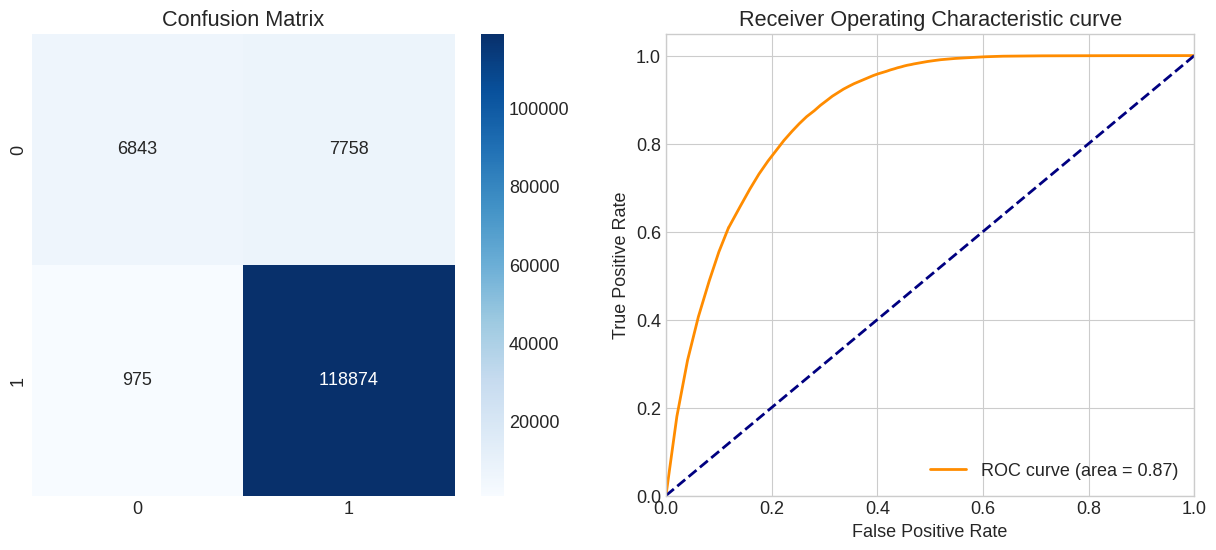

In [65]:
plot__model_performance(rf_orig_sex, data__orig_sex_test.features, y_test_sex)

The binary classifier's performance, showcasing a confusion matrix and an ROC curve.

**Confusion Matrix Insights**: This matrix details the number of correct and incorrect predictions:
   - Correct Predictions for Positive Class: 118,874
   - Correct Predictions for Negative Class: 6,843
   - Incorrect Positive Predictions: 7,758
   - Incorrect Negative Predictions: 975

**Performance Metrics**:
   - **Accuracy**: The classifier's accuracy is noted as 93.54%, representing the proportion of total correct predictions.
   - **F1 Score**: The F1 Score, at 96.46%, reflects the balance between precision and recall, particularly important in uneven class distributions.

**ROC Curve Analysis**: This graph demonstrates the classifier's performance across different thresholds by plotting the rate of correctly predicted positive instances against the rate of incorrectly predicted positive instances.
   - The ROC curve of the classifier is depicted in orange.
   - The diagonal dashed line indicates random guesswork.
   - With an AUC of 0.87, the classifier demonstrates commendable discriminatory power.

In essence, the classifier is effective in differentiating between classes, as evidenced by a substantial AUC. Nonetheless, the observed count of false positives may raise issues contingent on the context of the classifier’s application and the implications of misclassification.

Both the models have a few decent metrics (not excellent), so I will involve these models for original models.

##  **Bias and Fairness**

Today, an issue of the model that can be produced by Machine Learning is the bias that data can have. So an inquiry is the way to gauge those biases and how to keep away from them. In Python, there is a package created by IBM called [aif360](https://github.com/IBM/AIF360) that can give us a few metrics and algorithms to be aware if our data/model is biased and to get a fair model.

### **4.1 Metrics**

So with aif360, we have a few metrics that demonstrate assuming our data or model is biased. I will utilize 5 metrics :
* Statistical Parity Difference
* Equal Opportunity Difference
* Average Absolute Odds Difference
* Disparate Impact
* Theil Index

#### **4.1.1 Statistical Parity Difference**

This action depends on the accompanying formula :

$$ Pr(Y=1|D=unprivileged) - Pr(Y=1|D=privileged) $$

Here the bias or *statistical imparity* is the distinction between the probability that a random individual drawn from unprivileged is labeled 1 (indicating an income of more than 50K) and the probability that a random person from special is labeled 1.

So it has to be close to **0** so it will be fair.


#### **4.1.2 Equal Opportunity Difference**

This metric is only a contrast between the genuine positive pace of the unprivileged group and the genuine positive pace of the favored group so it follows this equation :

$$ TPR_{D=unprivileged} - TPR_{D=privileged} $$

Same as the past metric we really want it to be near **0**.

#### **4.1.3 Average Absolute Odds Difference**

This action is utilizing both a false positive rate and a true positive rate to ascertain the bias. It's ascertaining the  equality of odds with the following equation :

$$ \frac{1}{2}[|FPR_{D=unprivileged} - FPR_{D=privileged} | + | TPR_{D=unprivileged} - TPR_{D=privileged}|]$$

It should be equivalent to **0** to be fair.

#### **4.1.4 Disparate Impact**

For this metric we utilize the accompanying equation :

$$ \frac{Pr(Y=1|D=unprivileged)}{Pr(Y=1|D=privileged)} $$

Like the main metric we utilize both probabilities of a random individual drawn from unprivileged or privileged with a label of 1 however here, it's a proportion.

It changes the goal, for the disparate impact, it's **1** that we want.

#### **4.1.5 Theil Index**

This action is otherwise called the generalized entropy index yet with $\alpha$ equivalents to 1 . So we can  calculate it with this equation :

$$ \frac{1}{n} \sum_{i=0}^{n} \frac{b_i}{\mu} ln \frac{b_i}{\mu} $$

Where $b_i = \hat{y}_i - y_i + 1 $

So it should be near **0** to be fair.


With these different metrics, we can see that for certain we want the prediction and for others simply the first dataset. For this reason, we will utilize 2 classes of the aif360 package: With these different metrics, we can see that for certain we want the prediction and for others simply the first dataset. For this reason, we will utilize 2 classes of the aif360 package:  `ClassificationMetric` and `BinaryLabelDatasetMetric`.


For the first, we  want the prediction so we can have the accompanying metrics :
* **Equal Opportunity Difference :**
   
`equal_opportunity_difference()`
* **Average Absolute Odds Difference :**

`average_abs_odds_difference()`
* **Theil Index :**

`theil_index()`

Then for the metrics that don't need prediction (the second class), we can utilize them with the accompanying functions :
* **Statistical Parity Difference : **

`statistical_parity_difference()`
* **Disparate Impact :**  

`disparate_impact()`


Now I construct a `DataFrame` that will keep the upsides of the different metrics I talked only above with a function.

In [66]:
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo__metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [67]:
def fair__metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred

    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]

    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)

    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}]
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}]

        classified_metric = ClassificationMetric(dataset,
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)

    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)

    return fair_metrics

def plot__fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125,
        bottom  =  0.1,
        right   =  0.9,
        top     =  0.9,
        wspace  =  .5,
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Bias metrics Check :"))
    display(Markdown("A model is deemed biased if it fails to meet any one of these five criteria."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])

        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')
        ax.set_xlabel('')

In [68]:
def get__fair_metrics_and_plot(data, model, plot=True, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair__metrics(data, pred)

    if plot:

        plot__fair_metrics(fair)
        display(fair)

    return fair

With the function that I made above, we will want to glance at the bias present in the information or the model.

### Bias metrics for the Sex model

### Bias metrics Check :

A model is deemed biased if it fails to meet any one of these five criteria.

#### For the VICTIM SEX attribute :

With default thresholds, bias against unprivileged group detected in **1** out of 5 metrics

#### For the VICTIM RACE attribute :

With default thresholds, bias against unprivileged group detected in **0** out of 5 metrics

statistical_parity_difference  equal_opportunity_difference  \
objective                         0.000000                      0.000000   
VICTIM SEX                        0.029173                     -0.006564   
VICTIM RACE                       0.011589                     -0.000190   

             average_abs_odds_difference  disparate_impact  theil_index  
objective                       0.000000          1.000000     0.000000  
VICTIM SEX                      0.142356          1.031213     0.026931  
VICTIM RACE                     0.020277          1.012195     0.026931

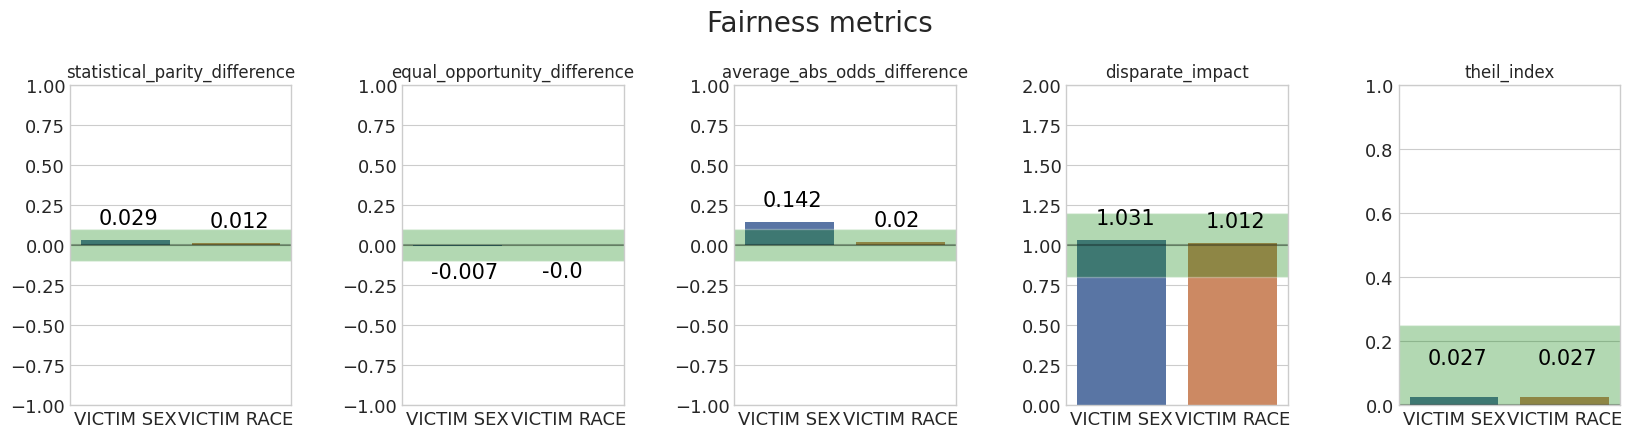

In [69]:
display(Markdown('### Bias metrics for the Sex model'))
fair = get__fair_metrics_and_plot(data__orig_sex_test, rf_orig_sex)

The fairness metrics for 'VICTIM SEX' and 'VICTIM RACE' in a machine learning model reveal:

**Statistical Parity Difference:** Slight disparity in outcomes, with 'VICTIM SEX' at 0.029173 and 'VICTIM RACE' at 0.011589.

**Equal Opportunity Difference:** Near-equal opportunities, with 'VICTIM SEX' at -0.006564 and 'VICTIM RACE' almost at 0 (-0.000190).

**Average Absolute Odds Difference:**Notable disparity for 'VICTIM SEX' (0.142356), less so for 'VICTIM RACE' (0.020277).

**Disparate Impact:** Both categories show minimal unfair impact, with 'VICTIM SEX' at 1.031213 and 'VICTIM RACE' at 1.012195.

**Theil Index:** Similar inequality levels for both 'VICTIM SEX' and 'VICTIM RACE', each at 0.026931.

Overall, the model demonstrates relatively fair outcomes, though there's a slightly higher disparity in 'VICTIM SEX' compared to 'VICTIM RACE'.

As we can see this model isn't exactly one-sided, yet it tends to be better and for this model, we will look at how to alleviate those biases.

In [70]:
data__orig_test = data__orig_sex_test
data__orig_train = data__orig_sex_train
rf = rf_orig_sex

probs = rf.predict_proba(data__orig_test.features)
preds = rf.predict(data__orig_test.features)
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf, fair, preds, probs, 'Origin')

As may be obvious, this first model is biased. The following stage is to respond to the questions: How to fix it?

### **4.2 How to fix it ?**

AIF360 use 3 types of algorithms :
* Pre-processing algorithms : they are utilized prior to training the model
* In-processing algorithms : they are fair classifiers so it's during the training
* Post-processing algorithms : they are utilized after training the model


This is the fairness pipeline. An example instantiation of this generic pipeline comprises stacking data into a dataset object, changing it into a fairer dataset using a fair pre-processing algorithm, gaining a classifier from this transformed dataset, and getting predictions from this classifier. Metrics can be determined on the first, transforming, and predicted datasets as well as between the transformed and predicted datasets.

#### **4.2.1 Pre-processing algorithms**

There are 4 pre-processing algorithms yet for 3 of them **there is a problem**: it will work only if the dataset has one protected attribute but here we have 2 : *Sex* and *Race*. However, we should have a speedy introduction for every one of them, and toward the end, I will involve the one that works for my case.

Since this notebook is an exploration of fairness into models I will just utilize 1 protected attribute: Victim Race, it will permit me to use almost all the algorithms (but for your information the *Reweighing* also can with all protected so that's why I will create a function that gives me the protected and unprotected attributes.




In [71]:
def get__attributes(data, selected_attr=None):
    unprivileged__groups = []
    privileged__groups = []
    if selected_attr == None:
        selected_attr = data.protected_attribute_names

    for attr in selected_attr:
            idx = data.protected_attribute_names.index(attr)
            privileged__groups.append({attr:data.privileged_protected_attributes[idx]})
            unprivileged__groups.append({attr:data.unprivileged_protected_attributes[idx]})

    return privileged__groups, unprivileged__groups

*****
##### **4.2.1.1 Disparate impact remover**

Disparate impact remover is a preprocessing technique that alters feature values and increases group fairness while protecting rank ordering inside groups.


Some code example :
```
from aif360.algorithms.preprocessing import DisparateImpactRemover
DIR = DisparateImpactRemover()
data_transf_train = DIR.fit_transform(data_orig_train)
```
*****
##### **4.2.1.2 Learning fair representations**

Learning fair representations is a pre-handling technique that finds a latent representation that encodes the data well but obfuscates information about protected attributes.

In [72]:
privileged__groups, unprivileged_groups = get__attributes(data__orig_train, selected_attr=['VICTIM RACE'])
t0 = time()

LFR_model = LFR(unprivileged_groups=unprivileged_groups, privileged_groups=privileged__groups, k=1, verbose=0)
# LFR.fit(data_orig_train)
data_transf_train = LFR_model.fit_transform(data__orig_train)

# Train and save the model
rf_transf = RandomForestClassifier().fit(data_transf_train.features,
                     data_transf_train.labels.ravel(),
                     sample_weight=data_transf_train.instance_weights)

data_transf_test = LFR_model.transform(data__orig_test)
fair = get__fair_metrics_and_plot(data_transf_test, rf_transf, plot=False)
probs = rf_transf.predict_proba(data__orig_test.features)
preds = rf_transf.predict(data__orig_test.features)

algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_transf, fair, preds, probs, 'LFR')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 62.61s


*****
##### **4.2.1.3 Optimized preprocessing**

Improved preprocessing is a preprocessing strategy that learns a probabilistic change that alters the highlights and labels in the data with group fairness, individual distortion, and data fidelity constraints and objectives.


*****
##### **4.2.1.4 Reweighing**

Reweighing is a preprocessing method that Weighs the examples in each (group, label) combination diversely to guarantee fairness before classification.

In [73]:
privileged_groups, unprivileged_groups = get__attributes(data__orig_train, selected_attr=['VICTIM RACE'])
t0 = time()

RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
# RW.fit(data_orig_train)
data_transf_train = RW.fit_transform(data__orig_train)

# Train and save the model
rf_transf = RandomForestClassifier().fit(data_transf_train.features,
                     data_transf_train.labels.ravel(),
                     sample_weight=data_transf_train.instance_weights)

data_transf_test = RW.transform(data__orig_test)
fair = get__fair_metrics_and_plot(data__orig_test, rf_transf, plot=False)
probs = rf_transf.predict_proba(data__orig_test.features)
preds = rf_transf.predict(data__orig_test.features)

algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_transf, fair, preds, probs, 'Reweighing')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 91.75s


#### **4.2.2 In-processing algorithms**

It exists 3 in-processing algorithms with aif360. However **I will just utilize 2** : *Adversarial Debiasing* which is utilizing TensorFlow and *Prejudice Remover Regularizer*. I'm not utilizing the final remaining one : *ART Classifier*, because I found no documentation that shows how it functions (perhaps I didn't look adequately through ).


*****
#####  **4.2.2.1 Adversarial Debiasing**

Adversarial debiasing is an in-processing method that learns a classifier to boost prediction exactness and all the while diminish an enemy's capacity to decide the protected attribute from the predictions. This approach prompts a fair classifier as the predictions cannot carry any gathering discrimination information that the adversary can advantage of.

In [74]:
import tensorflow as tf

# Enable TensorFlow 1.x compatibility mode
tf.compat.v1.disable_eager_execution()

sess = tf.compat.v1.Session()
# ... rest of your TensorFlow 1.x code

# Remember to close the session when done
sess.close()


*****
##### **4.2.2.2 Prejudice Remover Regularizer**

Prejudice remover is an in-processing method that adds a discrimination-aware regularization term to the learning objective.

In [75]:
t0 = time()
debiased_model = PrejudiceRemover(sensitive_attr="VICTIM RACE", eta = 25.0)
debiased_model.fit(data__orig_train)

fair = get__fair_metrics_and_plot(data__orig_test, debiased_model, plot=False, model_aif=True)
data_pred = debiased_model.predict(data__orig_test)

algo_metrics = add_to_df_algo_metrics(algo_metrics, debiased_model, fair, data_pred.labels, data_pred.scores, 'PrejudiceRemover')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 840.69s


#### **4.2.3 Post-processing algorithms**

There exist 3 post-processing algorithms with aif360.


I set up the predicted dataset for all the algorithms that require a dataset with predicted scores and labels

In [76]:
data_orig_test_pred = data__orig_test.copy(deepcopy=True)

# Prediction with the original RandomForest model
scores = np.zeros_like(data__orig_test.labels)
scores = rf.predict_proba(data__orig_test.features)[:,1].reshape(-1,1)
data_orig_test_pred.scores = scores

preds = np.zeros_like(data__orig_test.labels)
preds = rf.predict(data__orig_test.features).reshape(-1,1)
data_orig_test_pred.labels = preds

def format_probs(probs1):
    probs1 = np.array(probs1)
    probs0 = np.array(1-probs1)
    return np.concatenate((probs0, probs1), axis=1)

**4.2.3.1 Calibrated Equality of Odds**

Aligned equalized odds postprocessing is a post-processing method that improves over-calibrated classifier score results to find probabilities with which to change output labels with an equalized odds objective.

In [77]:
privileged_groups, unprivileged_groups = get__attributes(data__orig_train, selected_attr=['VICTIM RACE'])
t0 = time()

cost_constraint = "fnr" # "fnr", "fpr", "weighted"

CPP = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     cost_constraint=cost_constraint,
                                     seed=42)

CPP = CPP.fit(data__orig_test, data_orig_test_pred)
data_transf_test_pred = CPP.predict(data_orig_test_pred)

fair = fair__metrics(data__orig_test, data_orig_test_pred, pred_is_dataset=True)

algo_metrics = add_to_df_algo_metrics(algo_metrics,
                                      CPP,
                                      fair,
                                      data_transf_test_pred.labels,
                                      format_probs(data_transf_test_pred.scores),
                                      'CalibratedEqOdds')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 1.40s


*****
##### **4.2.3.2 Equality of Odds**

Equalized odds postprocessing is a post-processing procedure that settles a linear program to find probabilities with which to change yield labels to upgrade equalized odds.

*I attempted to utilized it, yet a mistake continue to happen so this is my desired code to use*

Some code example :
```
privileged_groups, unprivileged_groups = get_attributes(data_orig_train, selected_attr=['VICTIM RACE'])
EOPP = EqOddsPostprocessing(privileged_groups = privileged_groups,
                             unprivileged_groups = unprivileged_groups,
                             seed=42)
EOPP = EOPP.fit(data_orig_test, data_orig_test_pred)
data_transf_test_pred = EOPP.predict(data_orig_test_pred)
```

*****
#####** 4.2.3.3 Reject Option Classification**

Reject choice classification is a post-processing method that gives ideal results to unprivileged groups and unfavorable results to privileged groups in a certainty band around the decision limit with the highest uncertainty.

### **4.3 Compare all the algorithms for one attribute**

In [78]:
def plot__fair_metrics_plotly(fair_metrics):
    bottom = [-1, -1, -1, 0, 0]
    max_valid = [0.1, 0.1, 0.1, 1.2, 0.25]
    min_valid = [-0.1, -0.1, -0.1, 0.8, 0]
    cols = fair_metrics.columns.values

    for i in range(0, 5):
        col = cols[i]

        x, y = (fair_metrics[col].values, fair_metrics.index)
        colors = []
        for v in x:
            color = '#e74c3c' if v < min_valid[i] or v > max_valid[i] else '#2ecc71'
            colors.append(color)

        trace = go.Bar(x=x, y=y, marker=dict(color=colors)
                       , opacity=0.9, orientation='h')

        layout = go.Layout(barmode='group',
                           title=col,
                           xaxis=dict(range=[bottom[i], bottom[i] + 2]),
                           yaxis=go.layout.YAxis(automargin=True),
                           shapes=[
                               {
                                   'type': 'line',
                                   'x0': min_valid[i],
                                   'y0': -1,
                                   'x1': min_valid[i],
                                   'y1': len(y),
                                   'line': {
                                       'color': 'rgb(0, 0, 0)',
                                       'width': 2,
                                   },
                               }, {
                                   'type': 'line',
                                   'x0': max_valid[i],
                                   'y0': -1,
                                   'x1': max_valid[i],
                                   'y1': len(y),
                                   'line': {
                                       'color': 'rgb(0, 0, 0)',
                                       'width': 2,
                                   },
                               }])
        fig = go.Figure([trace], layout=layout)
        py.iplot(fig)


def plot__score_fair_metrics(score):
    display(score.sort_values(['nb_valid', 'score'], ascending=[0, 1]))
    score.sort_values(['nb_valid', 'score'], ascending=[1, 0], inplace=True)

    gold, silver, bronze, other = ('#FFA400', '#bdc3c7', '#cd7f32', '#3498db')
    colors = [gold if i == 0 else silver if i == 1 else bronze if i == 2 else other for i in range(0, len(score))]
    colors = [c for c in reversed(colors)]

    x, y = (score['score'].values, score.index)

    trace = go.Bar(x=x, y=y, marker=dict(color=colors)
                   , opacity=0.9, orientation='h')
    layout = go.Layout(barmode='group',
                       title='Fairest algorithm',
                       yaxis=go.layout.YAxis(automargin=True))
    fig = go.Figure([trace], layout=layout)
    py.iplot(fig)


def score__fair_metrics(fair):
    objective = [0, 0, 0, 1, 0]
    max_valid = [0.1, 0.1, 0.1, 1.2, 0.25]
    min_valid = [-0.1, -0.1, -0.1, 0.8, 0]

    nb_valid = np.sum(((fair.values > min_valid) * (fair.values < max_valid)), axis=1)
    score = np.sum(np.abs(fair.values - objective), axis=1)
    score = np.array([score, nb_valid])

    score = pd.DataFrame(data=score.transpose(), columns=['score', 'nb_valid'], index=fair.index)
    return score


def score__all_attr(algo_metrics):
    attributes = algo_metrics.loc['Origin', 'fair_metrics'].index.values[1:]

    all_scores = np.zeros((len(algo_metrics), 2))
    for attr in attributes:
        df_metrics = pd.DataFrame(columns=algo_metrics.loc['Origin', 'fair_metrics'].columns.values)
        for fair in algo_metrics.loc[:, 'fair_metrics']:
            df_metrics = df_metrics.append(fair.loc[attr], ignore_index=True)
        all_scores = all_scores + score__fair_metrics(df_metrics).values

    final = pd.DataFrame(data=all_scores, columns=['score', 'nb_valid'], index=algo_metrics.index)
    return final


In [79]:
def compare_fair_metrics(algo_metrics, attr='VICTIM RACE'):

    df_metrics = pd.DataFrame(columns=algo_metrics.loc['Origin','fair_metrics'].columns.values)
    for fair in algo_metrics.loc[:,'fair_metrics']:
        df_metrics = df_metrics.append(fair.loc[attr], ignore_index=True)

    df_metrics.index = algo_metrics.index.values
    df_metrics = df_metrics.replace([np.inf, -np.inf], np.NaN)

    display(df_metrics)
    plot__fair_metrics_plotly(df_metrics)
    score = score__fair_metrics(df_metrics)
    plot__score_fair_metrics(score.dropna())

In [80]:
compare_fair_metrics(algo_metrics)

statistical_parity_difference  equal_opportunity_difference  \
Origin                                 0.011589                     -0.000190   
LFR                                    0.000000                      0.000000   
Reweighing                             0.011438                      0.000726   
PrejudiceRemover                       0.000000                      0.000000   
CalibratedEqOdds                       0.011589                     -0.000190   

                  average_abs_odds_difference  disparate_impact  theil_index  
Origin                               0.020277          1.012195     0.026931  
LFR                                       NaN          1.000000     0.000000  
Reweighing                           0.014760          1.012028     0.026815  
PrejudiceRemover                     0.000000          1.000000     0.032705  
CalibratedEqOdds                     0.020277          1.012195     0.026931

score  nb_valid
PrejudiceRemover  0.032705       5.0
Reweighing        0.065767       5.0
Origin            0.071183       5.0
CalibratedEqOdds  0.071183       5.0

So presently we see that it's the Beginning model (Random Forest) isn't the fairest one!

Presently how about we analyze our algorithm for the performance.

### **4.4 Compare algorithms performance**

In [81]:
def plot_compare_model_performance(algo_metrics, dataset):
    X_test = dataset.features
    y_true = dataset.labels
    perf_metrics = pd.DataFrame()

    models_name = algo_metrics.index.values

    fig = plt.figure(figsize=(7, 7))
    plt.title('ROC curve for differents models')
    lw = 2
    palette = sns.color_palette("Paired")

    for model_name, i in zip(models_name, range(0, len(models_name))):
        model = algo_metrics.loc[model_name, 'model']

        if model_name != 'AdvDebiasing':
            probs = algo_metrics.loc[model_name, 'probs']
            y_pred = algo_metrics.loc[model_name, 'prediction']
            accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

            perf_metrics = perf_metrics.append(
                pd.DataFrame([[accuracy, f1]], columns=['Accuracy', 'F1 Score'], index=[model_name]))
            plt.plot(fpr, tpr, color=palette[i], lw=lw, label=str(model_name) + ' (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='skyblue', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")
    display(perf_metrics.sort_values(by=['Accuracy', 'F1 Score'], ascending=[False, False]))
    plt.show()

In [82]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, accuracy_score

def get_model_performance(X_test, y_true, y_pred, probs):
    # Assuming y_true and y_pred are properly formatted
    # and probs contains the predicted probabilities

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate confusion matrix
    matrix = confusion_matrix(y_true, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Check and use the appropriate column from probs
    if probs.shape[1] == 1:
        # If probs has one column, use it for positive class probability
        preds = probs[:, 0]
    else:
        # If probs has two columns, use the second one
        preds = probs[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc


Accuracy  F1 Score
Origin            0.935046  0.964569
Reweighing        0.934942  0.964522
LFR               0.891402  0.942583
PrejudiceRemover  0.891402  0.942583
CalibratedEqOdds  0.552480  0.678070

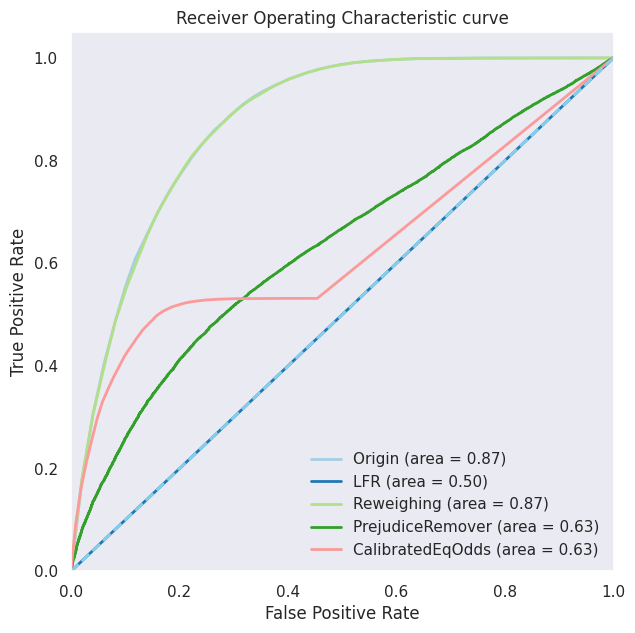

In [83]:
plot_compare_model_performance(algo_metrics, data__orig_test)

The data analyzes different machine learning fairness techniques—Reweighing (Accuracy: 0.935, F1 Score: 0.965), Origin (Accuracy: 0.935, F1 Score: 0.965), LFR and PrejudiceRemover (both with Accuracy: 0.892, F1 Score: 0.943), and CalibratedEqOdds (Accuracy: 0.553, F1 Score: 0.679). Reweighing and Origin lead to performance, indicating effective classification and balance. LFR and PrejudiceRemover show lower, however comparable scores, hinting at a fairness-performance trade-off. CalibratedEqOdds, zeroing on fairness, has quite lower scores,  proposing a critical split the difference in predictive accuracy.
So with this data, we see that the most unbiased algorithm is the less performant.

#**Discussion & Conclusion:**

##**Discussion**:
This in-depth analysis of the US Homicide Reports from 1980 to 2014 has unveiled critical insights into the intersection of AI and criminal justice, particularly in the context of bias detection and mitigation. Key findings include:

- **Trends and Demographics**: The study revealed notable trends in homicide cases over the years, including demographic shifts. This provided a window into understanding how societal changes might have influenced criminal patterns.
  
- **Victim-Perpetrator Dynamics**: The analysis of victim and perpetrator profiles uncovered patterns in their relationships. This aspect is particularly crucial for understanding the social context of these crimes and for guiding investigative strategies.
  
- **Bias Identification**: A significant outcome of this study was the identification of potential biases in predictive modeling. The relationship between the demographics of victims and perpetrators, as captured in the dataset, raised important questions about inherent biases in the criminal justice system and how these might be reflected in AI models.

- **Ethical AI Practices**: The study underscored the importance of ethical considerations in AI, especially in sensitive areas like criminal justice. It highlighted the need for continuous monitoring and adjustment of AI models to ensure fairness and prevent the perpetuation of existing societal biases.

##**Conclusion:**
This analysis journey, focusing on the ethics of AI in the realm of criminal justice, has highlighted the dual nature of AI as both a powerful analytical tool and a potential source of ethical challenges. The ability of AI models to predict perpetrator characteristics, while impressive in its accuracy, also brought to light the critical issue of bias. The application of AI Fairness 360 (AIF360) toolkit was instrumental in identifying and attempting to mitigate these biases, although it also revealed the complexities involved in balancing predictive accuracy with ethical responsibility.

The study goes beyond mere statistical analysis, delving into the broader implications for justice and societal perceptions. It brings to the forefront the necessity for a conscientious and balanced approach to AI deployment, especially in areas with profound societal impacts like criminal justice.

In conclusion, this analysis not only contributes to the technical field of AI in criminal justice but also sparks a vital conversation about the ethical dimensions of AI applications. As AI continues to evolve and integrate into various sectors, this study serves as a reminder of the importance of ethical vigilance. It calls for a collaborative effort among data scientists, ethicists, and domain experts to ensure that AI systems are not only effective but also fair and just.

The lessons learned from this study are critical in guiding future AI applications, ensuring that they contribute positively to society while upholding the highest ethical standards. In essence, this work lays the groundwork for future research and development in ethical AI, establishing a model for how data science can intersect with social responsibility.

# **References:**

U.S. Homicide Reports, 1980-2014. (n.d.). [Dataset; Kaggle]. In Ethics and AI. Available at: https://www.kaggle.com/datasets/jyzaguirre/us-homicide-reports

Bias and Fairness. (n.d.). [Dataset; Produced by IBM]. In aif360. Available at: https://github.com/Trusted-AI/AIF360

Statistical Parity Difference. (n.d.). [Dataset; Math ∩ Programming]. In One definition of algorithmic fairness. Available at: https://jeremykun.com/2015/10/19/one-definition-of-algorithmic-fairness-statistical-parity/

Equal Opportunity Difference. (n.d.). [Dataset; Aif360]. In Fairness Metrics. Available at: https://aif360.readthedocs.io/en/latest/modules/metrics.html

Feldman et al., 2015. (n.d.). [Dataset; ACM Digital Library]. In Disparate impact remover. Available at: https://www.acm.org/publications/digital-library

Calmon et al., 2017. (n.d.). [Dataset; Optimized Pre-Processing for Discrimination Prevention]. In Optimized preprocessing. Available at: https://papers.nips.cc/paper_files/paper/2017/hash/9a49a25d845a483fae4be7e341368e36-Abstract.html

Kamishima et al., 2012. (n.d.). [Dataset; SpringerLink]. In Prejudice Remover Regularizer. Available at: https://link.springer.com/chapter/10.1007/978-3-642-33486-3_3

Hardt et al., 2016. (n.d.). [Dataset; Equality of Opportunity in Supervised Learning]. In Equality of Odds. Available at: https://papers.nips.cc/paper_files/paper/2016/hash/9d2682367c3935defcb1f9e247a97c0d-Abstract.html

seaborn. (n.d.). [Dataset; Seaborn 0.9.0 documentation]. In statistical data visualization. Available at: https://seaborn.pydata.org/

Matplotlib. (n.d.). [Dataset; Matplotlib 3.1.1 documentation.]. In Matplotlib: Visualization with Python. Available at: https://matplotlib.org/

scikit-learn. (n.d.). [Dataset; Scikit-learn 0.21.3 documentation]. In Preprocessing data. Available at: https://scikit-learn.org/stable/index.html

plotly.com. (n.d.). Modern Analytic Apps for the Enterprise - Plotly. [online] Available at: https://plotly.com/

warnings. (n.d.). [Dataset; Python 3.8.5 documentation.]. In Warning control. Available at: https://docs.python.org/3/library/warnings.html

![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)